# 📊 Projet : Prédiction du Churn Client

Narration orientée business : destinée à un décideur marketing ou produit

**Problématique**

"Quels sont les clients à risque de churn, et quels profils faut-il cibler en priorité dans les campagnes de fidélisation ?"

## 1. Contexte Business

Dans un secteur comme la télécommunication ou le SaaS, la perte d’un client coûte plus cher que d’en acquérir un nouveau. L’objectif ici est d’identifier les clients à risque de churn (résiliation) pour déployer des actions préventives ciblées (offre personnalisée, relance, fidélisation).
opérateur télécom

Le dataset représente les clients d’un opérateur télécom (fictif) aux États-Unis. L’entreprise veut prédire quels clients sont susceptibles de résilier leur abonnement.



**🎯 Mission demandée par la direction** 

**Objectif principal** :
- Détecter les clients à risque de churn afin de permettre aux équipes CRM de cibler les bons profils avec des campagnes de fidélisation personnalisées.

**Objectifs secondaires** :
- Comprendre les facteurs qui influencent le churn (ex : service, prix, ancienneté…)

- Identifier des groupes de clients à risque élevé

- Livrer un modèle de scoring réutilisable dans un pipeline marketing ou dans le CRM



##  📦 2. Chargement des données

Aperçu des premières lignes & Description générale

In [1]:
# 🔧 Importation des librairies nécessaires
import pandas as pd

# 📁 Chargement des données
# (Assure-toi d’avoir téléchargé le fichier depuis Kaggle : https://www.kaggle.com/datasets/blastchar/telco-customer-churn)
file_path = "data/Customer-Churn.csv"
df = pd.read_csv(file_path)

# 👀 Aperçu des premières lignes
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# 📏 Dimensions du dataset
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")

Nombre de lignes : 7043
Nombre de colonnes : 21


In [3]:
# 📋 Types de données et non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# 📊 Statistiques descriptives pour les variables numériques
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
# 🧼 Détection des valeurs manquantes par colonne
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [6]:
# 📊 Aperçu rapide des colonnes catégorielles
cat_columns = df.select_dtypes(include='object').columns
for col in cat_columns:
    print(f"\n🧾 {col} - valeurs uniques :")
    print(df[col].value_counts())


🧾 customerID - valeurs uniques :
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64

🧾 gender - valeurs uniques :
gender
Male      3555
Female    3488
Name: count, dtype: int64

🧾 Partner - valeurs uniques :
Partner
No     3641
Yes    3402
Name: count, dtype: int64

🧾 Dependents - valeurs uniques :
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

🧾 PhoneService - valeurs uniques :
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

🧾 MultipleLines - valeurs uniques :
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

🧾 InternetService - valeurs uniques :
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

🧾 OnlineSecurity - valeurs uniques :
OnlineSecurity
No               

 🧾 Structure générale :
Le dataset contient :
- Un total de **7 043 clients** (`lignes`)
- **21 variables**, incluant des informations démographiques, contractuelles, d’utilisation de services, ainsi que la variable cible `Churn`

Les types de données incluent :
- Variables **numériques** (ex : `tenure`, `MonthlyCharges`, `TotalCharges`)
- Variables **catégorielles** (ex : `gender`, `Contract`, `PaymentMethod`, etc.)

 ⚠️ Points à surveiller :
- La colonne `TotalCharges` est au format objet alors qu'elle devrait être **numérique** : un nettoyage est nécessaire.
- Il existe potentiellement des **valeurs manquantes** ou vides, à vérifier précisément.
- Des colonnes comme `customerID` ne seront probablement **pas utiles** pour la modélisation (identifiants).

 Étapes suivantes :
- Nettoyer les types mal formatés (ex : convertir `TotalCharges`)
- Gérer les valeurs manquantes
- Préparer les variables catégorielles pour l’analyse et la modélisation

## 🧹 3. Nettoyage et préparation des données

In [7]:
# 1. Essayer de convertir en numérique (sans modifier le DataFrame d'origine)
#    Les valeurs non convertibles seront transformées en NaN
totalcharges_numeric = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 2. Identifier les lignes problématiques (valeurs non convertibles → NaN)
invalid_rows = df[totalcharges_numeric.isna()]

# 3. Afficher les lignes non convertibles (avant correction)
print("Lignes où 'TotalCharges' n'est pas convertible (avant correction) :")
display(invalid_rows[['TotalCharges', 'MonthlyCharges']])

# 4. Afficher les valeurs uniques problématiques
print("Valeurs uniques non convertibles :")
print(invalid_rows['TotalCharges'].unique())

# 5. Sauvegarder les index à corriger
idx_to_fix = invalid_rows.index

# 6. Remplacer dans le DataFrame original les valeurs non convertibles par MonthlyCharges
df.loc[idx_to_fix, 'TotalCharges'] = df.loc[idx_to_fix, 'MonthlyCharges']

# 7. Afficher les mêmes lignes après correction
print("Lignes corrigées (après correction) :")
display(df.loc[idx_to_fix, ['TotalCharges', 'MonthlyCharges']])

# 8. Vérifier que toutes les valeurs sont maintenant convertibles
totalcharges_numeric_after = pd.to_numeric(df['TotalCharges'], errors='coerce')
fixed_rows = df[totalcharges_numeric_after.isna()]

print("Lignes où 'TotalCharges' n'est toujours pas convertible après correction :")
display(fixed_rows)


Lignes où 'TotalCharges' n'est pas convertible (avant correction) :


,TotalCharges,MonthlyCharges
488,,52.55
753,,20.25
936,,80.85
1082,,25.75
1340,,56.05
3331,,19.85
3826,,25.35
4380,,20.00
5218,,19.70
6670,,73.35


Valeurs uniques non convertibles :
[' ']
Lignes corrigées (après correction) :


,TotalCharges,MonthlyCharges
488,52.55,52.55
753,20.25,20.25
936,80.85,80.85
1082,25.75,25.75
1340,56.05,56.05
3331,19.85,19.85
3826,25.35,25.35
4380,20.0,20.00
5218,19.7,19.70
6670,73.35,73.35


Lignes où 'TotalCharges' n'est toujours pas convertible après correction :


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [8]:
# Nombre de valeurs manquantes par colonne
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [9]:
# Lignes avec manquant
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
# Suppression des lignes avec des valeurs manquantes car nouveau contrat donc pas de TotalCharges
df = df.dropna()

In [11]:
# Vérification des valeurs manquantes restantes
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 📊 4. Analyse exploratoire (EDA)



###  Vue d’ensemble des clients


C:\Users\yonas\AppData\Local\Temp\ipykernel_26304\1806446242.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


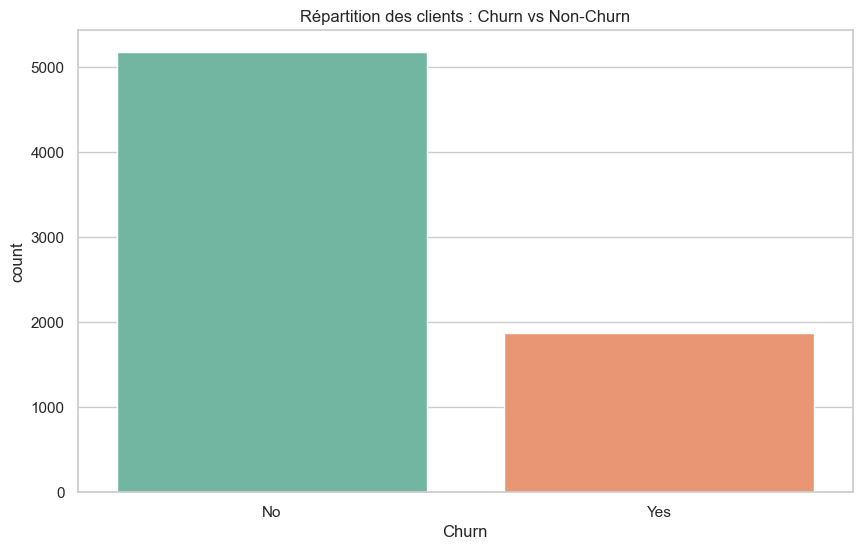

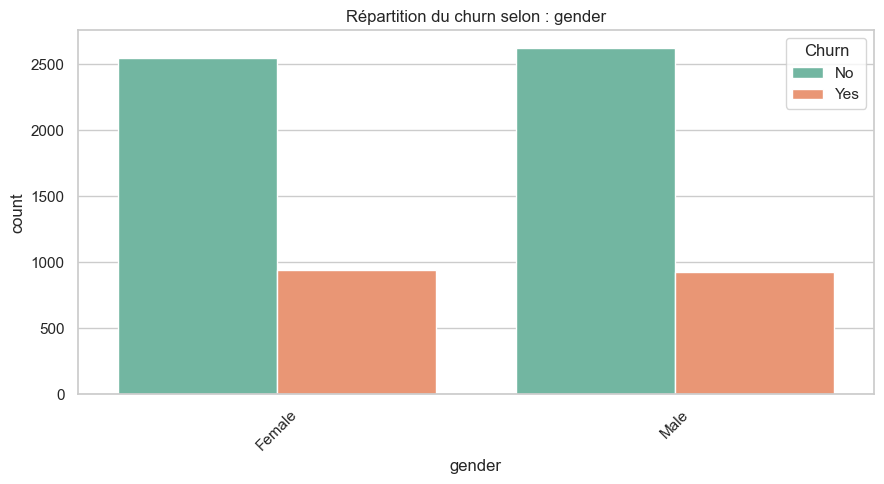

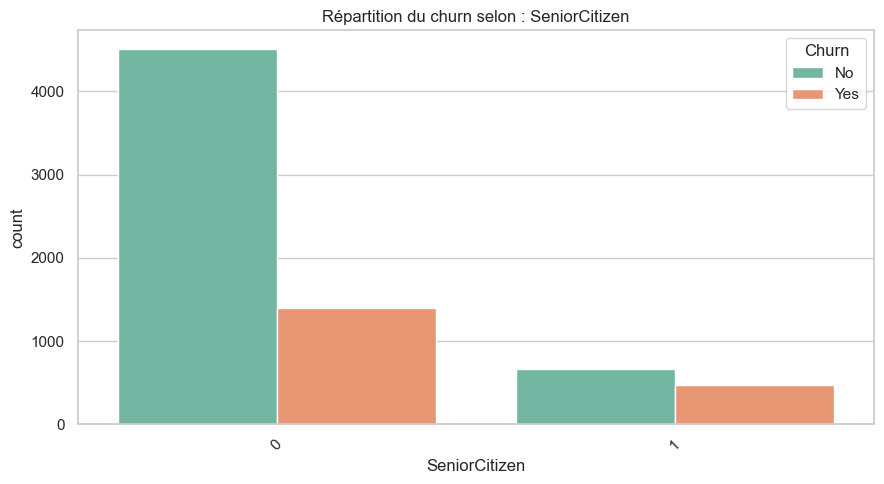

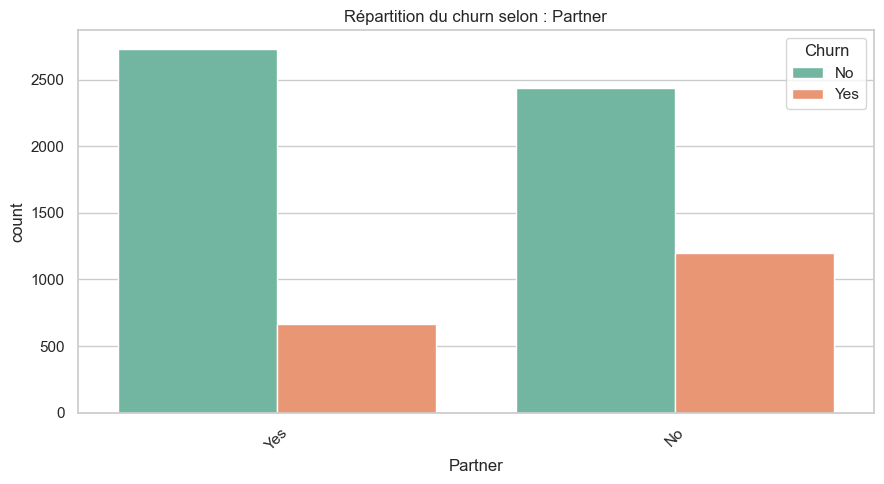

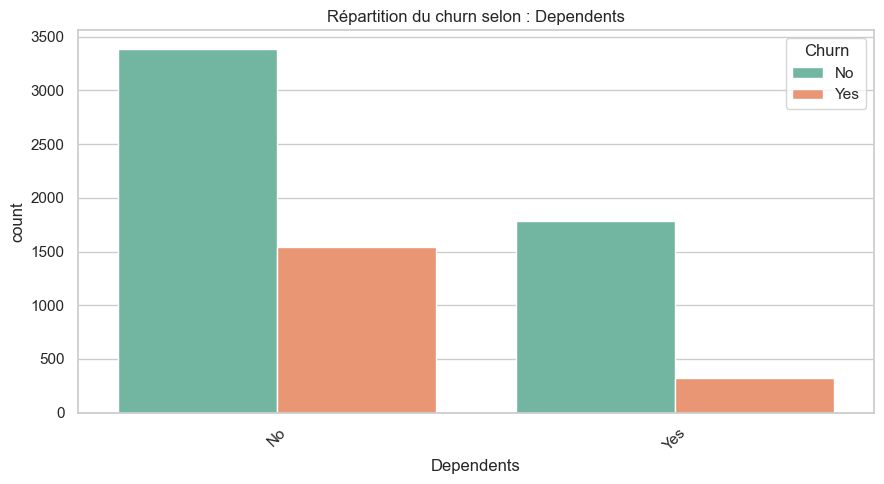

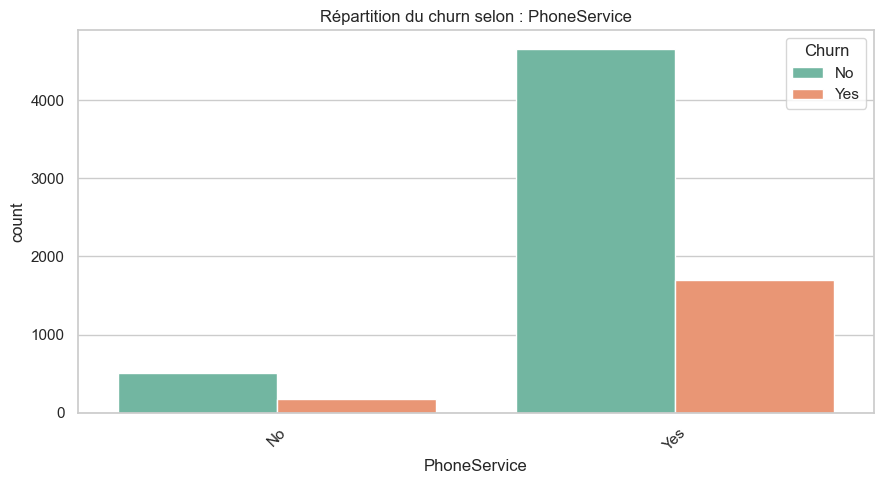

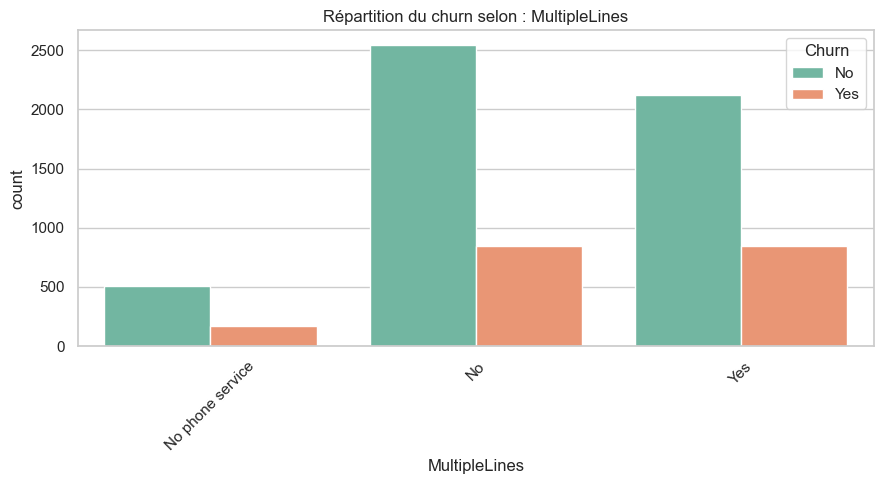

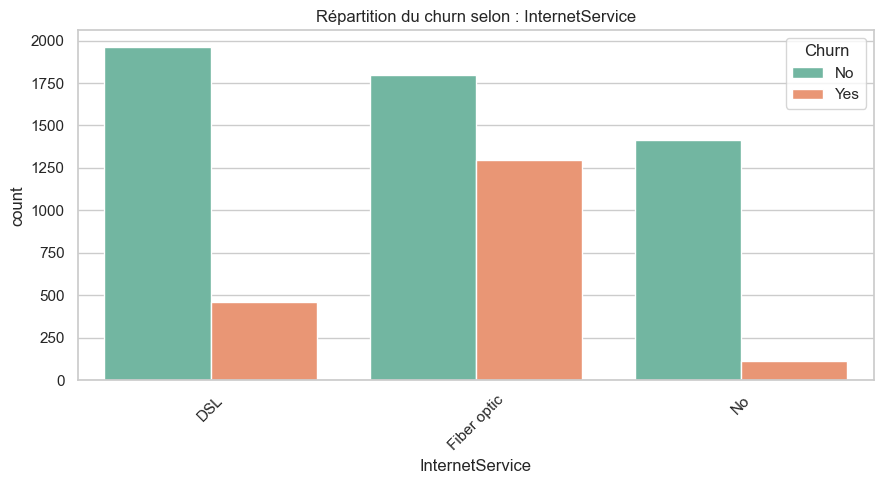

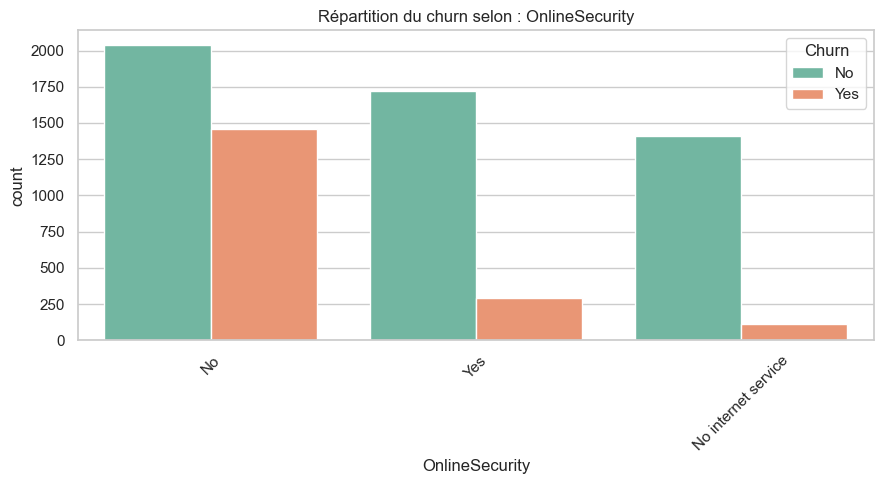

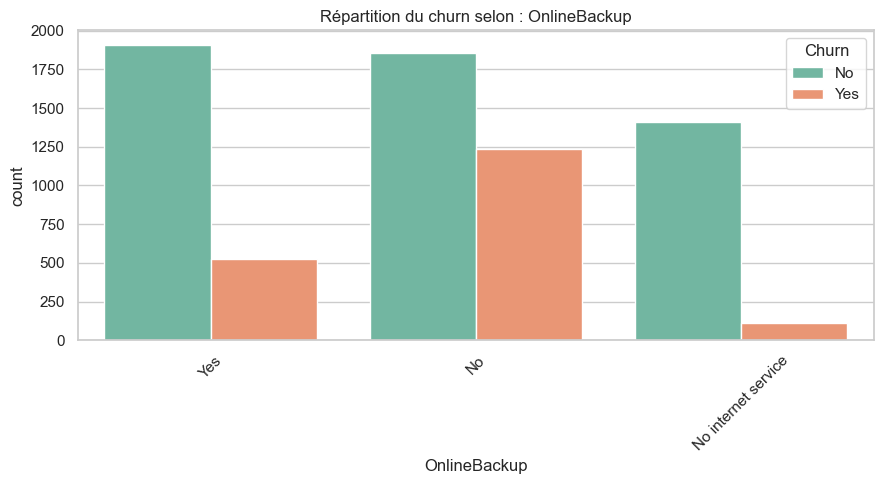

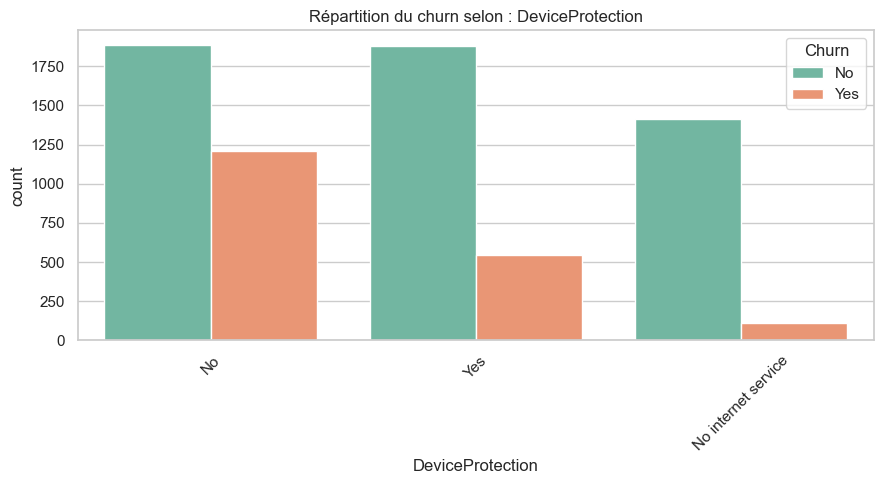

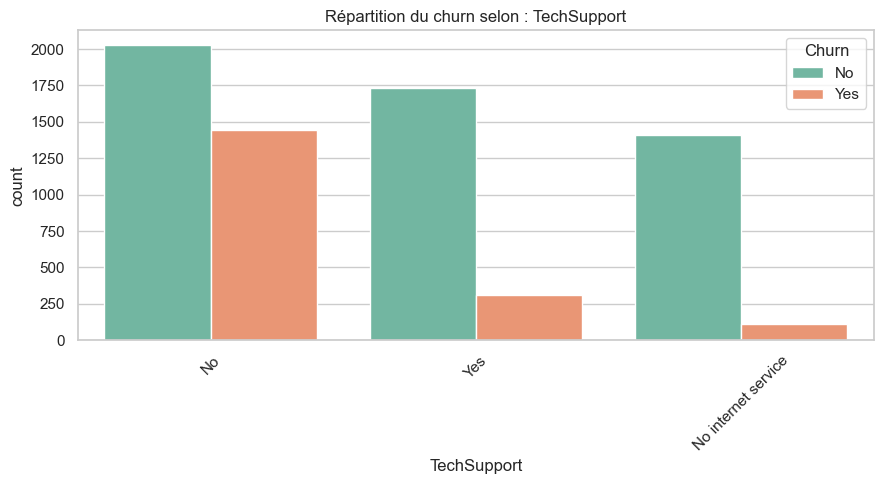

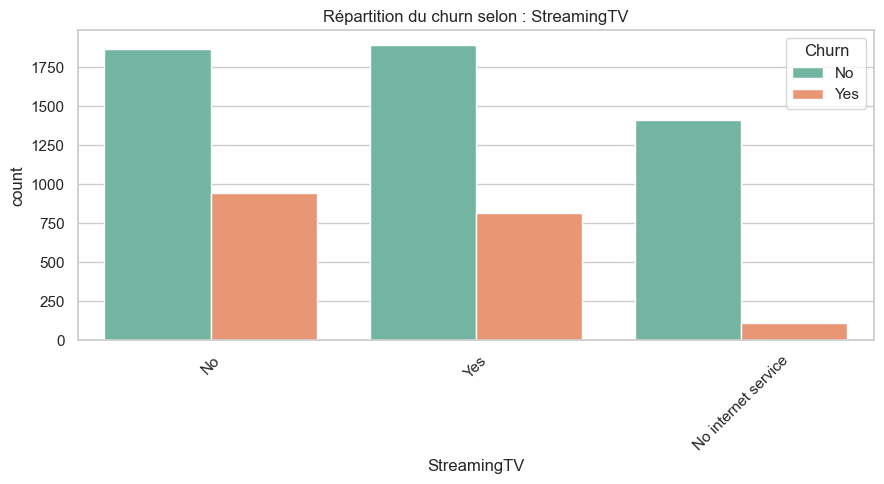

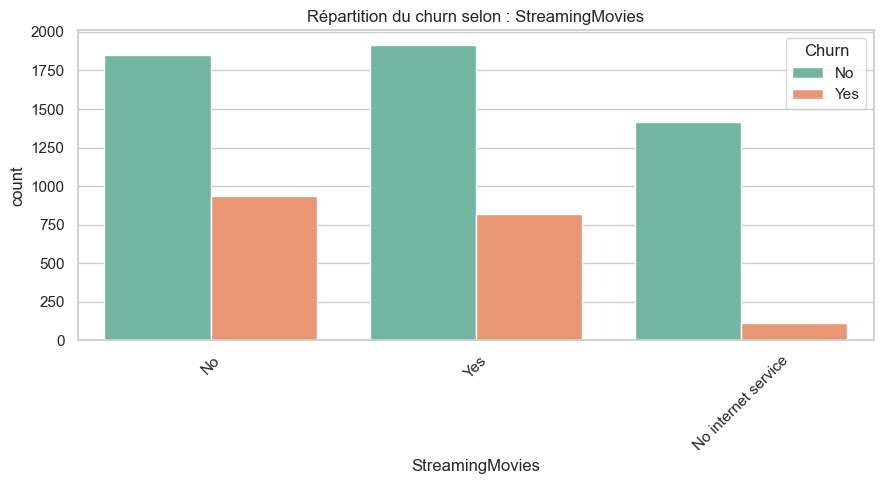

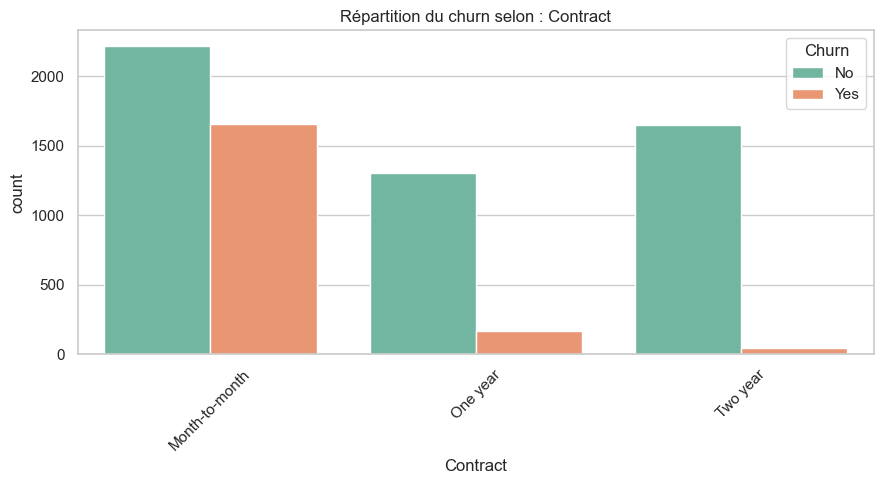

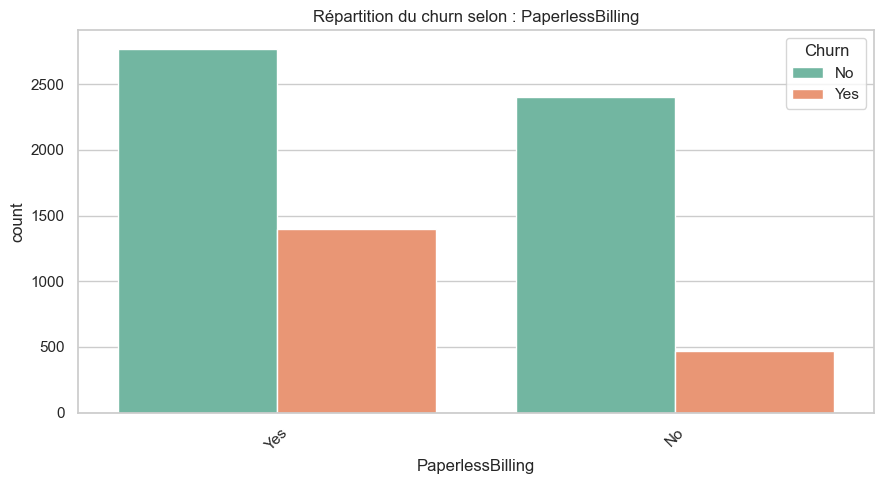

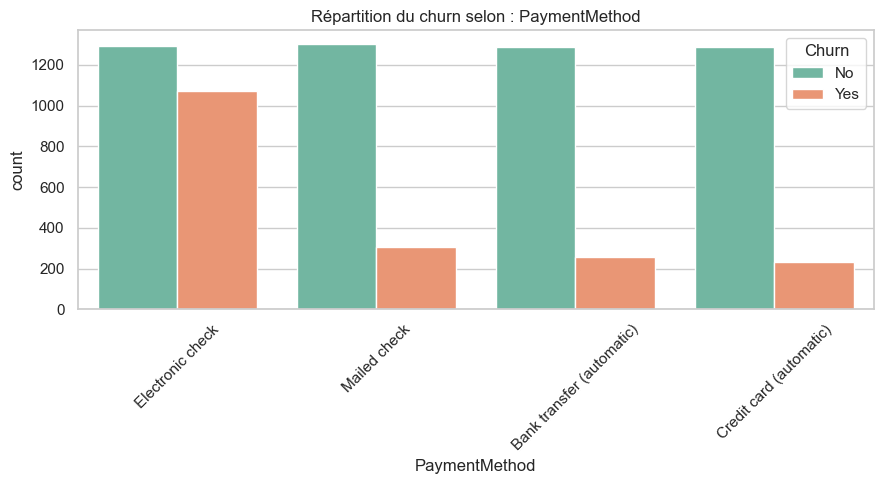

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Style graphique
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Répartition globale churn / non churn
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title("Répartition des clients : Churn vs Non-Churn")
plt.show()

# 2. Variables catégorielles à explorer
cat_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
            'PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
            'TechSupport', 'StreamingTV', 'StreamingMovies', 
            'Contract', 'PaperlessBilling', 'PaymentMethod']

# 3. Boucle pour afficher la répartition du churn par variable
for var in cat_vars:
    plt.figure(figsize=(9, 5))
    sns.countplot(data=df, x=var, hue='Churn', palette='Set2')
    plt.title(f"Répartition du churn selon : {var}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



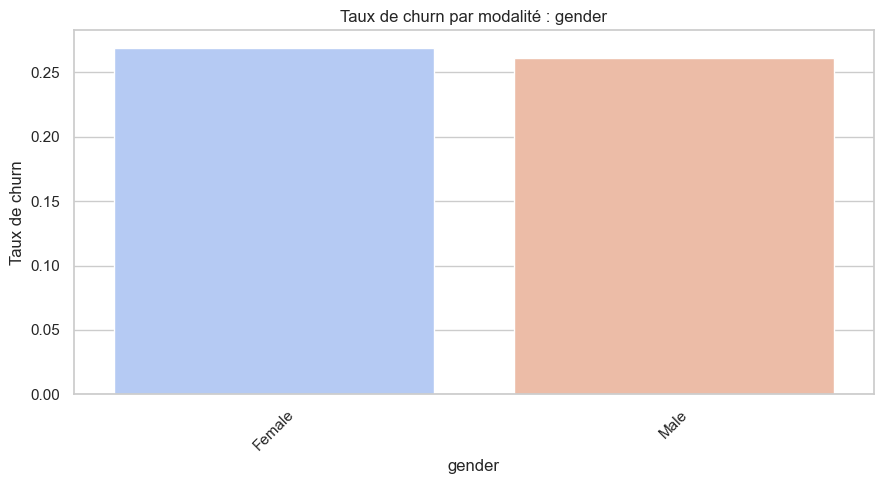

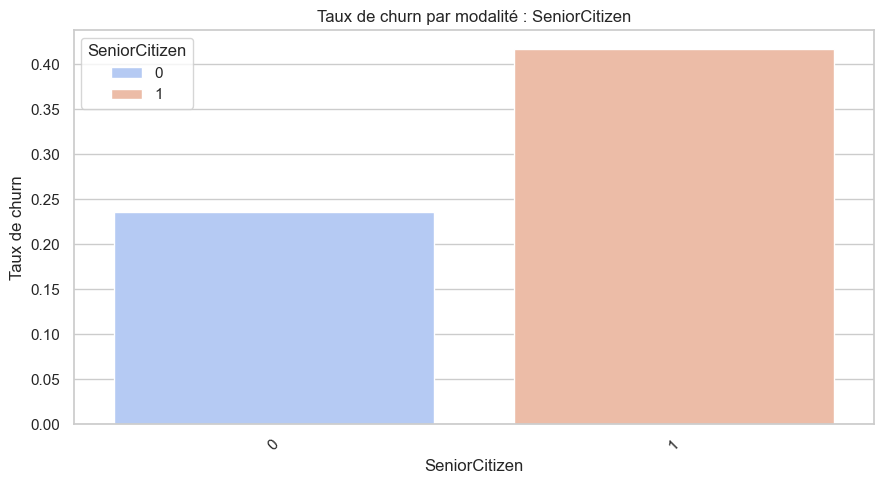

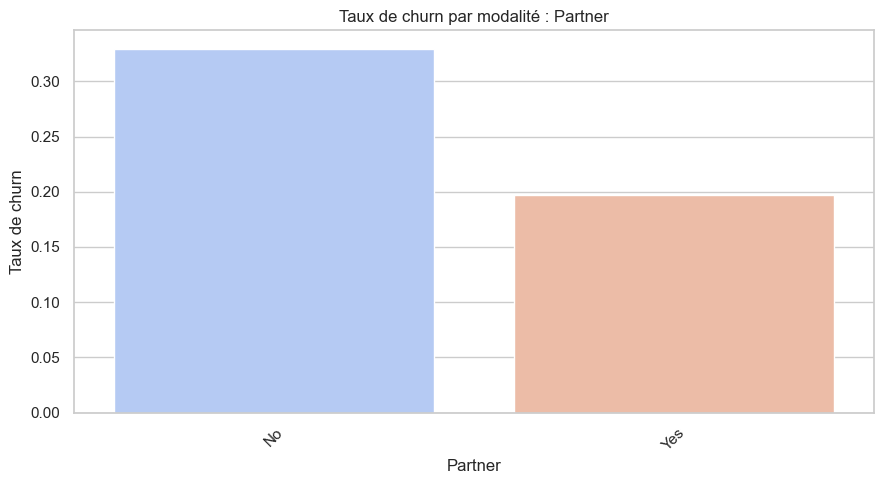

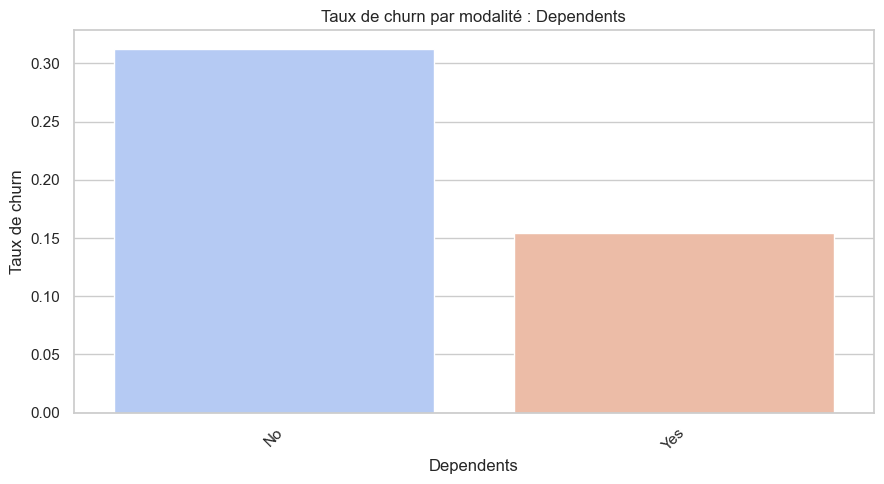

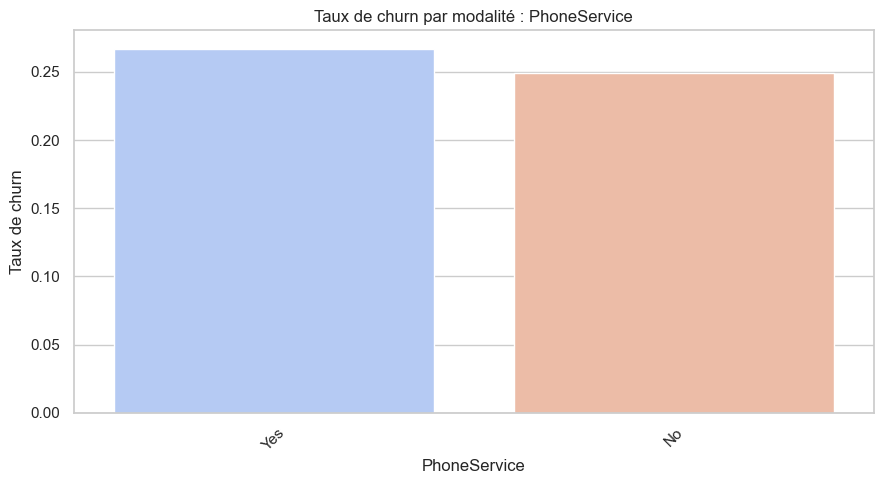

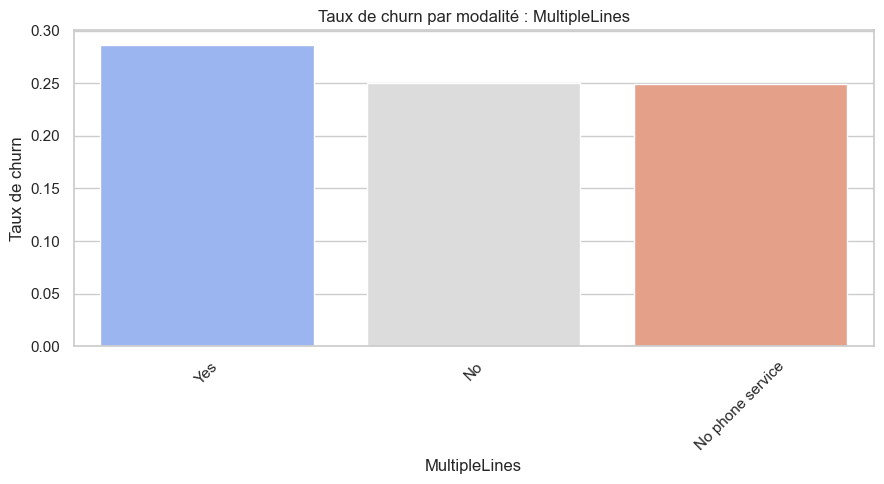

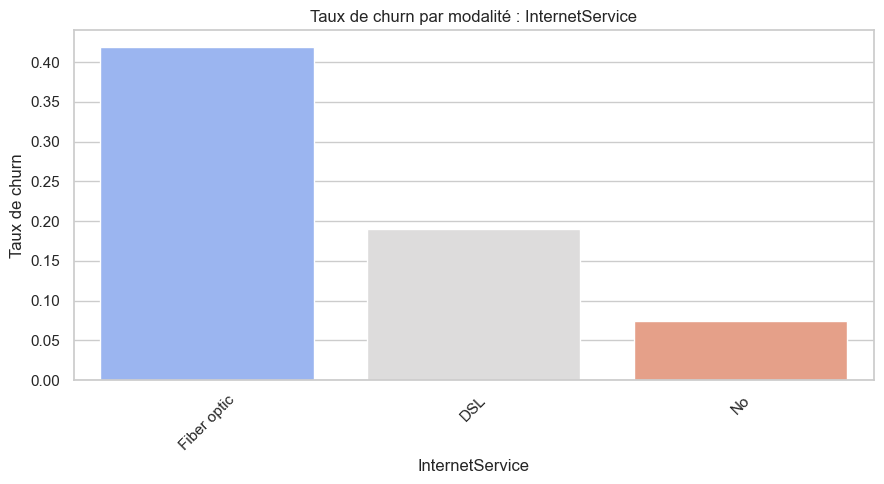

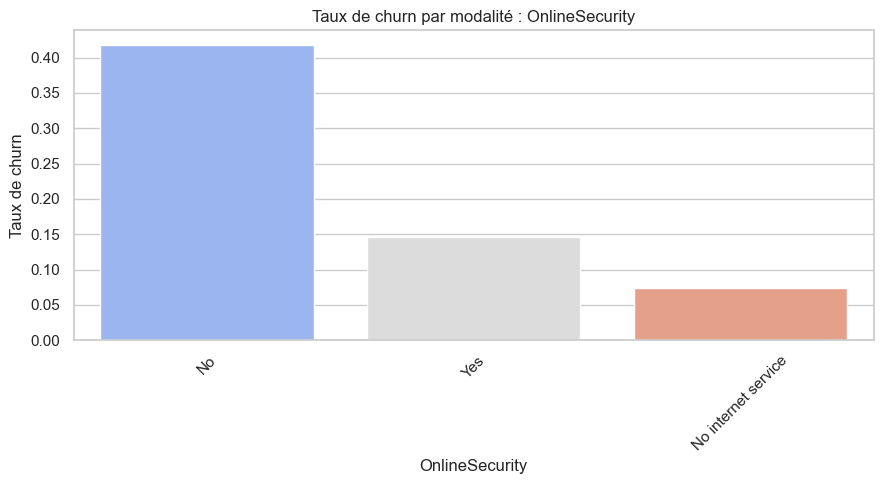

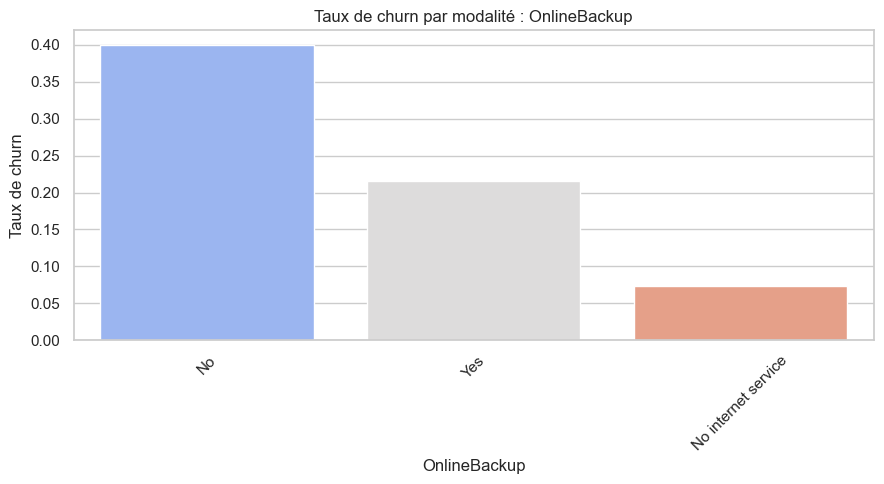

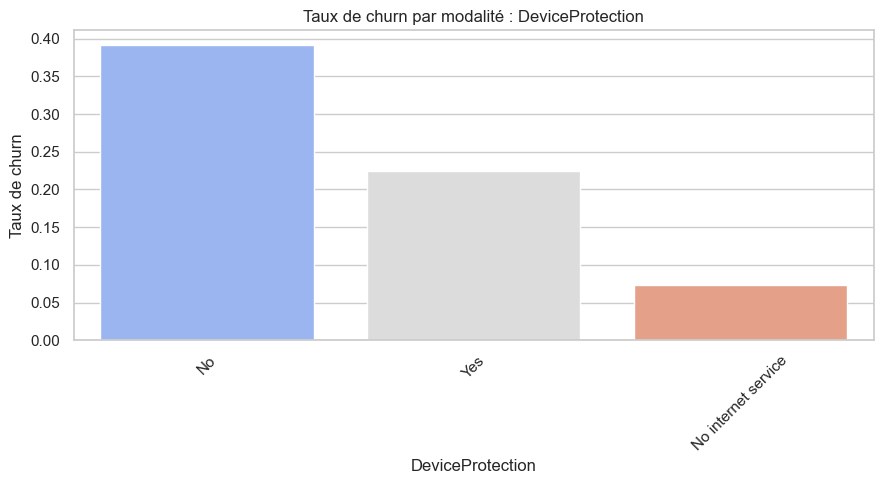

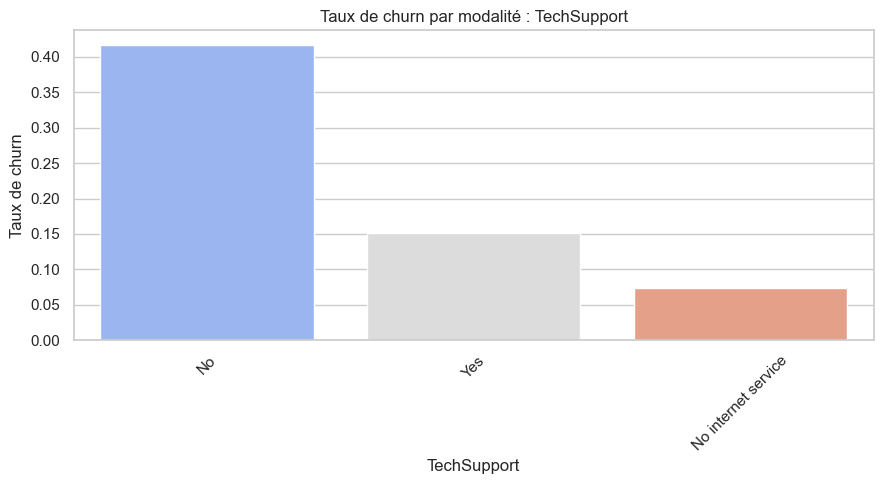

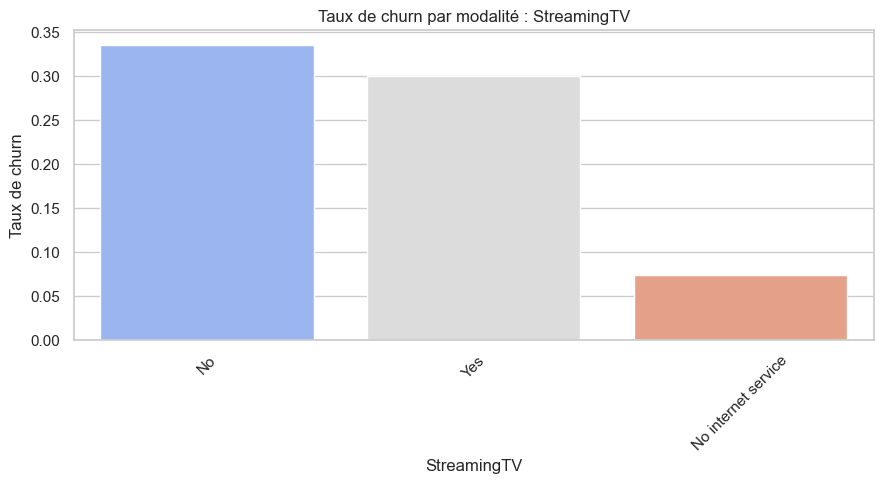

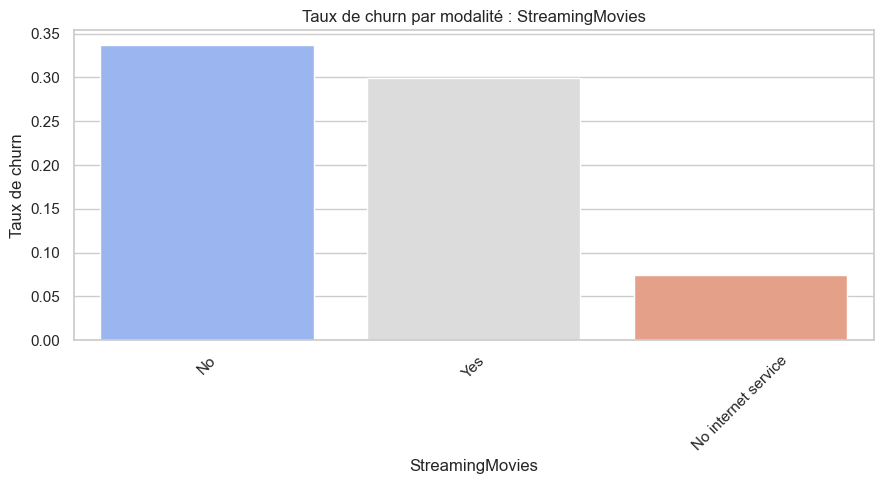

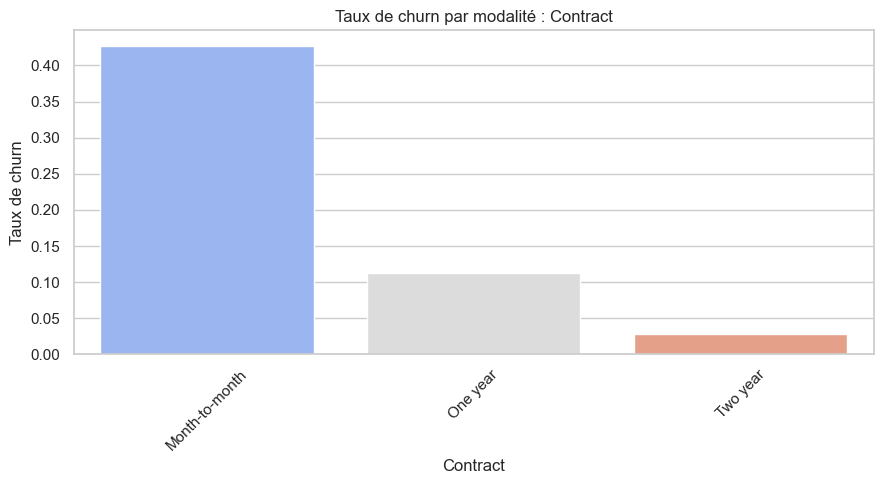

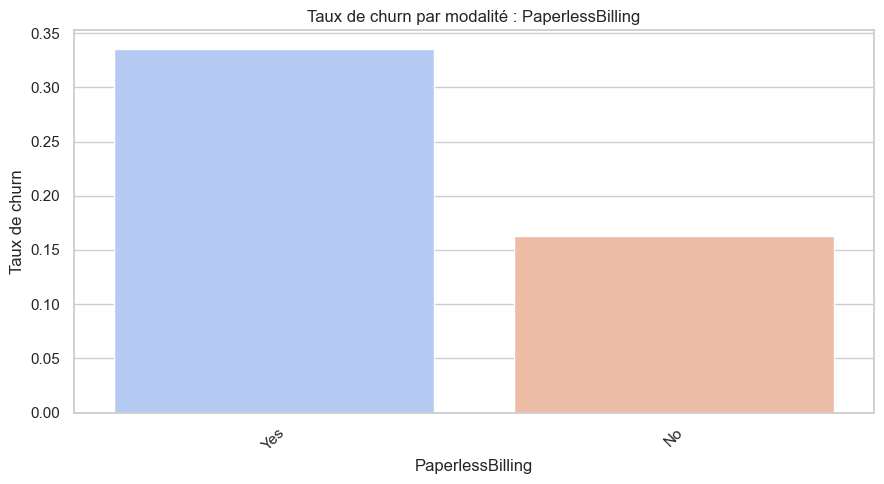

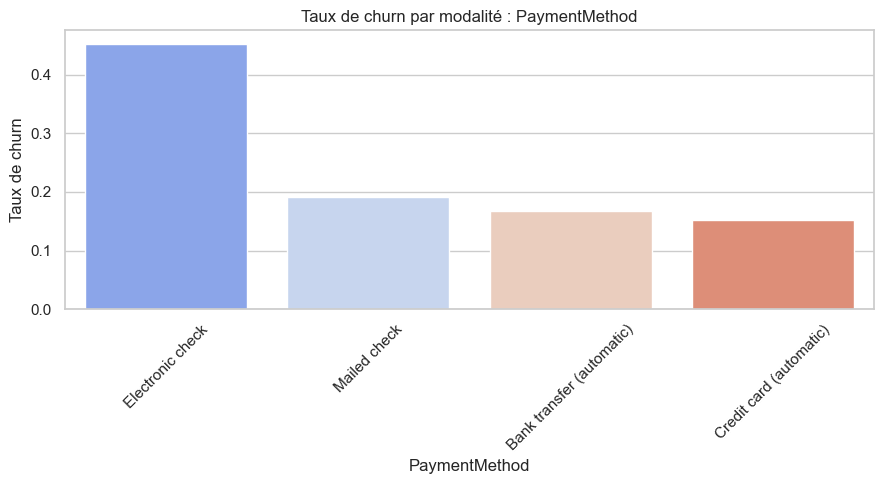

In [14]:
# 4. Taux de churn par segment
for var in cat_vars:
    churn_rate = df.groupby(var)['Churn'].value_counts(normalize=True).unstack().fillna(0)['Yes']
    churn_rate = churn_rate.sort_values(ascending=False)
    
    plt.figure(figsize=(9, 5))
    sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='coolwarm',hue=churn_rate.index)
    plt.title(f"Taux de churn par modalité : {var}")
    plt.ylabel("Taux de churn")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Comportements de churn

Facture totale moyenne par churn :
Churn
No     2549.999497
Yes    1531.796094
Name: TotalCharges, dtype: float64

Nombre d'outliers TotalCharges pour Churn = No : 0
Nombre d'outliers TotalCharges pour Churn = Yes : 109



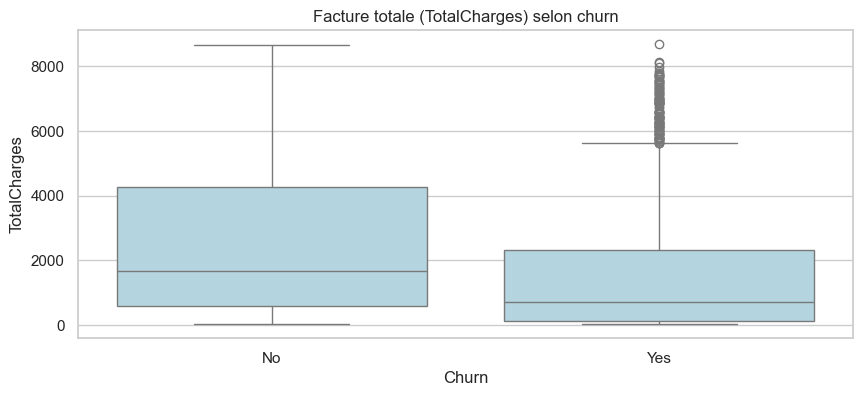

Ancienneté moyenne (mois) par churn :
Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

Nombre d'outliers tenure pour Churn = No : 0
Nombre d'outliers tenure pour Churn = Yes : 23



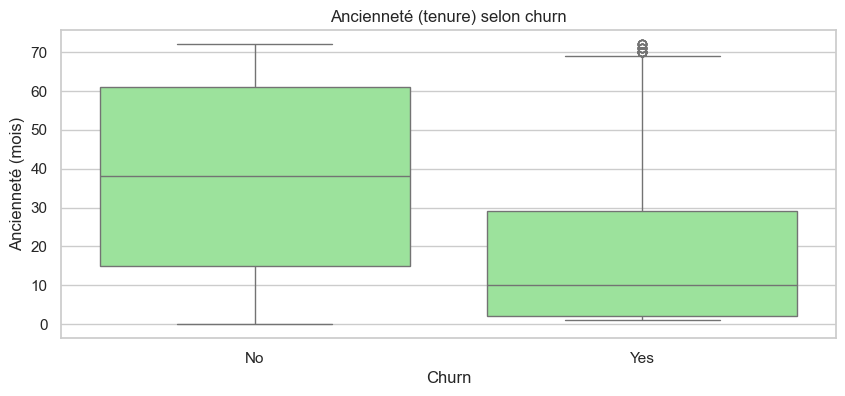

Répartition churn par type de contrat :
Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319



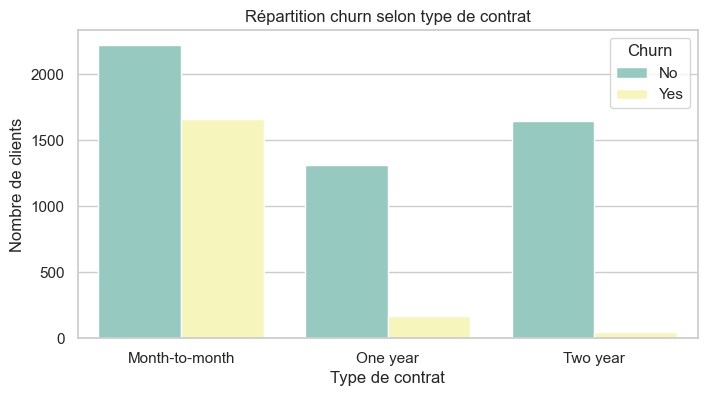

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pour s'assurer que TotalCharges est bien numérique
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers)

# 1. Facture totale selon churn
print("Facture totale moyenne par churn :")
print(df.groupby('Churn')['TotalCharges'].mean())
print()

for churn_status in df['Churn'].unique():
    outliers_count = count_outliers(df.loc[df['Churn'] == churn_status, 'TotalCharges'].dropna())
    print(f"Nombre d'outliers TotalCharges pour Churn = {churn_status} : {outliers_count}")
print()

plt.figure(figsize=(10,4))
sns.boxplot(x='Churn', y='TotalCharges', data=df, color='lightblue')
plt.title("Facture totale (TotalCharges) selon churn")
plt.ylabel("TotalCharges")
plt.show()

# 2. Ancienneté selon churn
print("Ancienneté moyenne (mois) par churn :")
print(df.groupby('Churn')['tenure'].mean())
print()

for churn_status in df['Churn'].unique():
    outliers_count = count_outliers(df.loc[df['Churn'] == churn_status, 'tenure'].dropna())
    print(f"Nombre d'outliers tenure pour Churn = {churn_status} : {outliers_count}")
print()

plt.figure(figsize=(10,4))
sns.boxplot(x='Churn', y='tenure', data=df, color='lightgreen')
plt.title("Ancienneté (tenure) selon churn")
plt.ylabel("Ancienneté (mois)")
plt.show()

# 3. Répartition churn selon type de contrat
print("Répartition churn par type de contrat :")
print(pd.crosstab(df['Contract'], df['Churn'], normalize='index'))
print()

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set3')
plt.title("Répartition churn selon type de contrat")
plt.xlabel("Type de contrat")
plt.ylabel("Nombre de clients")
plt.show()


<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

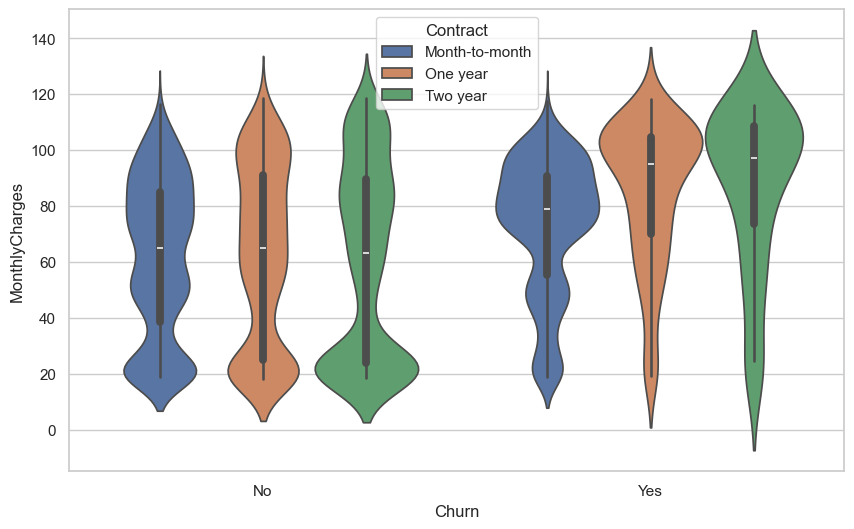

In [16]:
sns.violinplot(data=df, x='Churn', y='MonthlyCharges', hue='Contract')

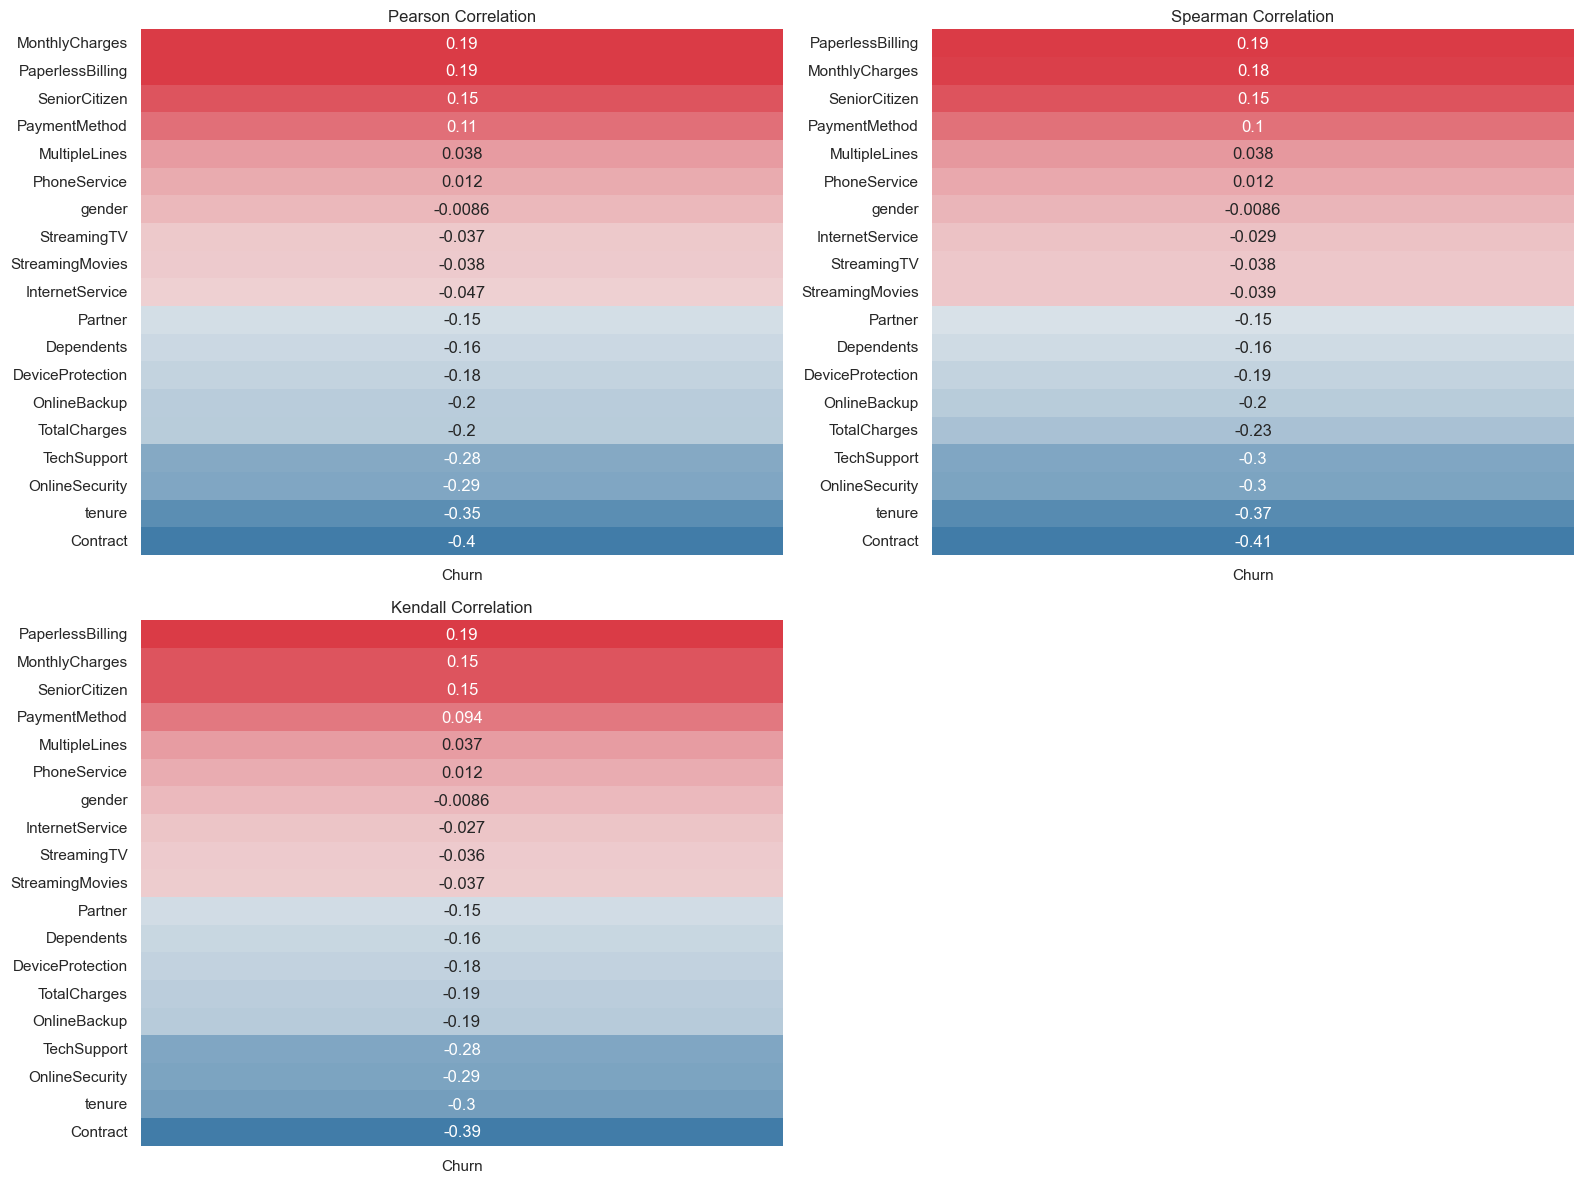

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


df_corr = df.copy()
# Exclure la colonne 'id' avant calcul de corrélation
df_corr = df.drop(columns=['customerID'])

# Sélection des colonnes de type object
cat_cols = df_corr.select_dtypes(include=['object']).columns.tolist()
# Conversion par Label Encoding (conversion simple en entiers)
for col in cat_cols:
    df_corr[col] = df_corr[col].astype('category').cat.codes

    
# Vérification : la cible doit être numérique (0/1)
assert set(df_corr['Churn'].unique()).issubset({0,1})



# Plot corrélations entre features et Churn
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

methods = ['pearson', 'spearman', 'kendall']
titles = ['Pearson Correlation', 'Spearman Correlation', 'Kendall Correlation']

for ax, method, title in zip(axes[:3], methods, titles):
    corr_Churn = df_corr.corr(method=method)['Churn'] \
                   .sort_values(ascending=False) \
                   .to_frame()[1:]  # enlever 'Churn' lui-même
    cmap = sns.diverging_palette(240, 10, as_cmap=True)
    sns.heatmap(corr_Churn, annot=True, cmap=cmap, cbar=False, ax=ax)
    ax.set_title(title)

axes[-1].axis('off')  # dernier subplot vide
plt.tight_layout()
plt.show()


In [43]:
from scipy.stats import ttest_ind

churn = df[df['Churn'] == 'Yes']['tenure']
no_churn = df[df['Churn'] == 'No']['tenure']
ttest_ind(churn, no_churn, equal_var=False)

TtestResult(statistic=np.float64(-34.823818696312976), pvalue=np.float64(1.1954945472607151e-232), df=np.float64(4048.287609494835))

- La p-value est très inférieure à 0.05, donc on rejette l’hypothèse nulle.

- Il y a une différence statistiquement significative entre la tenure moyenne des clients qui churnent et ceux qui restent.

- Le signe négatif de statistic indique que la moyenne de tenure est plus basse chez les clients qui churnent.

---

#### 💡 Points clés à retenir

**Côté Business**

- Les clients churneurs ont une **facture totale moyenne plus faible** (~1532 €) comparée aux non churneurs (~2555 €), ce qui peut indiquer qu'ils partent avant d'atteindre une "valeur client" intéressante pour l'entreprise.  
- Les churneurs ont une **ancienneté moyenne beaucoup plus courte** (environ **18 mois**) contre **38 mois** pour les clients fidèles. Cela suggère que le churn se produit surtout dans les premières phases de la relation client.
- Le **type de contrat** a un impact majeur :
  - Près de **43% des clients avec un contrat "month-to-month" churnent**, contre seulement **11% en contrat "one year"** et **3% en "two year"**.
  - Cela montre l'**importance de l'engagement contractuel** dans la rétention client.
- Des **outliers significatifs** sont présents parmi les churneurs :
  - **109 outliers** pour la facture totale et **23 outliers** pour l'ancienneté.
  - Ces profils extrêmes peuvent correspondre à des cas particuliers (ex. départ précipité après une forte facturation, ou clients très récents mais insatisfaits).
  -**“On conserve les valeurs extrêmes car elles reflètent des situations réelles de clients à très haute facturation.”**
- Un test t réalisé entre la durée d'abonnement (tenure) des clients churners et non churners indique une différence très significative (t = -34.8, p < 0.001), les clients churnant ayant une durée moyenne d'engagement nettement plus faible

**Côté Modélisation**
- Faire attention au déséquilibre de classes (5k vs 2k )
- La **facture totale (TotalCharges)** et **l'ancienneté (tenure)** sont **deux variables quantitatives clés** à surveiller : elles montrent une forte différenciation entre churneurs et non churneurs.
- Le **type de contrat** est une **variable catégorielle très discriminante** qu’il faudra inclure dans tous les modèles.
- La **gestion des outliers** est importante : ils peuvent impacter négativement certains algorithmes (notamment les modèles sensibles aux valeurs extrêmes comme la régression logistique).
- Ces observations orientent directement les étapes de **feature engineering** (ex. binarisation des types de contrat, création d’indicateurs de durée de vie client) et peuvent également nourrir des règles métiers simples pour une stratégie de churn précoce.

---


###  KPIs business

In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
# Conversion de Churn en binaire
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
# Taux de churn global
churn_rate = df['Churn'].mean()
print(f"Taux de churn global : {churn_rate:.2%}")

# Durée de vie moyenne (ancienneté en mois)
avg_tenure_churn = df[df['Churn'] == 1]['tenure'].mean()
print(f"Durée de vie moyenne d’un client churné : {avg_tenure_churn:.2f} mois")

# Montant moyen perdu par client churné
avg_revenue_churn = df[df['Churn'] == 1]['TotalCharges'].mean()
print(f"Montant moyen perdu par churn : {avg_revenue_churn:.2f} €")
print("")

# Sélection des clients churnés
df_churn = df[df['Churn'] == 1].copy()

# Revenu mensuel moyen des churnés
monthly_revenue_churn = df_churn['MonthlyCharges'].mean()

# Nombre de clients churnés
n_churn = df_churn.shape[0]

# Calcul de la valeur perdue selon différentes durées
loss_1_month = monthly_revenue_churn * n_churn
loss_6_months = monthly_revenue_churn * 6 * n_churn
loss_12_months = monthly_revenue_churn * 12 * n_churn

# Affichage
print(f"💰 Perte estimée si les churnés étaient restés 1 mois : {loss_1_month:,.2f} €")
print(f"💰 Perte estimée si les churnés étaient restés 6 mois : {loss_6_months:,.2f} €")
print(f"💰 Perte estimée si les churnés étaient restés 12 mois : {loss_12_months:,.2f} €")
print("")

# Pourcentage de churns retenus
retention_rates = [0.1, 0.2, 0.5]

# Gain si on retient X% des churnés (sur 12 mois)
gains = {f"{int(rate*100)}%": loss_12_months * rate for rate in retention_rates}

# Affichage
print("💼 Gain potentiel si on retient une partie des churnés (sur 12 mois) :")
print("")
for k, v in gains.items():
    print(f"✅ {k} des churnés retenus = +{v:,.2f} € sur 1 an")


# Gain si on retient X% des churnés (sur 1 mois)
gains_1m = {f"{int(rate*100)}%": loss_1_month * rate for rate in retention_rates}

# Affichage
print("")
print("💼 Gain potentiel si on retient une partie des churnés (sur 1 mois) :")
print("")
for k, v in gains_1m.items():
    print(f"✅ {k} des churnés retenus = +{v:,.2f} € sur 1 mois")



Taux de churn global : 26.54%
Durée de vie moyenne d’un client churné : 17.98 mois
Montant moyen perdu par churn : 1531.80 €

💰 Perte estimée si les churnés étaient restés 1 mois : 139,130.85 €
💰 Perte estimée si les churnés étaient restés 6 mois : 834,785.10 €
💰 Perte estimée si les churnés étaient restés 12 mois : 1,669,570.20 €

💼 Gain potentiel si on retient une partie des churnés (sur 12 mois) :

✅ 10% des churnés retenus = +166,957.02 € sur 1 an
✅ 20% des churnés retenus = +333,914.04 € sur 1 an
✅ 50% des churnés retenus = +834,785.10 € sur 1 an

💼 Gain potentiel si on retient une partie des churnés (sur 1 mois) :

✅ 10% des churnés retenus = +13,913.09 € sur 1 mois
✅ 20% des churnés retenus = +27,826.17 € sur 1 mois
✅ 50% des churnés retenus = +69,565.43 € sur 1 mois


---

#### 📌 Insights orientés métier

- 🔻 Le **taux de churn global** s’élève à **26,58%**, ce qui représente plus d’un quart de la base clients — un enjeu critique de rétention.

- 📉 Les clients churnés ont une **durée de vie moyenne de seulement 18 mois**, soit moins de la moitié de celle des clients fidèles (~38 mois). Cela révèle un **problème de fidélisation à court terme**.

- 💰 Le **montant moyen perdu par client churné** est de **1 531,80 €**. Cela donne un ordre de grandeur du **coût d’un churn**.

- 💸 La **perte estimée** si ces clients avaient été conservés serait de :
  - **139 130 € sur 1 mois**
  - **834 785 € sur 6 mois**
  - **1 669 570 € sur 12 mois**

- ✅ Une **amélioration de la rétention même partielle** aurait un **impact direct sur le revenu** :
  - Garder **10%** des churnés pendant 1 mois = **+13 913 €**
  - Garder **20%** = **+27 826 €**
  - Garder **50%** = **+69 565 €**

> Ces résultats permettent de **quantifier l’opportunité d’agir sur le churn**. Une stratégie de rétention ciblée (sur les clients en contrat "Month-to-month", à faible ancienneté, ou avec peu de services activés) pourrait générer un retour sur investissement très rapide.

---

## 🧠 5. Modélisation prédictive

Standardisation 

In [20]:

from sklearn.preprocessing import StandardScaler



col_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()

for col in col_scale:
    df[col] = scaler.fit_transform(df[[col]])

### Split des données (train/test stratify)

In [21]:
from sklearn.model_selection import train_test_split

df_labeled = df.drop(columns=['customerID','MultipleLines'])

# Supposons que la colonne cible s'appelle 'Churn'
X = df_labeled.drop(columns=['Churn'])
y = df_labeled['Churn']

# Split train (70%) et temp (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

# Résumé des tailles
print(f"Train set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

X_train.columns

Train set size: 4930
Test set size: 2113


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')

### Target Encoding


In [22]:
from category_encoders import TargetEncoder


cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

te = TargetEncoder(cols=cat_cols)
X_train[cat_cols] = te.fit_transform(X_train[cat_cols], y_train)
X_test[cat_cols] = te.transform(X_test[cat_cols])

In [23]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5557,0.263051,0,0.329163,0.314756,-1.114563,0.268832,0.418466,0.420254,0.402894,0.392056,0.419328,0.303452,0.336613,0.428624,0.156716,0.456469,0.513107,-0.836308
2270,0.263051,1,0.329163,0.314756,-1.196004,0.268832,0.418466,0.420254,0.402894,0.229384,0.419328,0.303452,0.336613,0.428624,0.340068,0.456469,0.734126,-0.908355
6930,0.263051,0,0.196459,0.314756,-1.196004,0.268832,0.418466,0.420254,0.402894,0.392056,0.419328,0.335763,0.336613,0.428624,0.340068,0.147142,0.345265,-0.910208
2257,0.263051,0,0.329163,0.314756,1.125057,0.268832,0.191691,0.420254,0.402894,0.229384,0.153687,0.303452,0.302434,0.109284,0.156716,0.147142,0.524739,1.132659
898,0.263051,0,0.329163,0.314756,-0.829521,0.268832,0.418466,0.146873,0.402894,0.392056,0.153687,0.303452,0.302434,0.428624,0.340068,0.162983,1.134619,-0.511279


### XGBOOST x GRIDSEARCH 

In [24]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier


In [25]:



# Préparation du modèle XGBoost
xgb_model = XGBClassifier(eval_metric='aucpr', random_state=42)

# Grid des hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100, 200,500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.1 , 0.3 , 0.5,0.7, 1],
}

# GridSearch avec validation croisée 3-fold, scoring par AUC
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Lancement du GridSearch sur le train set
grid_search.fit(X_train, y_train)

print(f"Meilleurs paramètres : {grid_search.best_params_}")
print(f"Meilleur score AUC CV : {grid_search.best_score_:.4f}")



Fitting 5 folds for each of 225 candidates, totalling 1125 fits
Meilleurs paramètres : {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.3}
Meilleur score AUC CV : 0.8493


### VISUALISATION DES RESULTATS

In [26]:
# Supposons que grid_search est ta GridSearchCV
import pandas as pd

results_df = pd.DataFrame(grid_search.cv_results_)
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

display(results_df[['params', 'mean_test_score', 'std_test_score']])

,params,mean_test_score,std_test_score
16,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.849333,0.012563
15,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.848939,0.011459
17,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.848863,0.012582
18,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.848738,0.012984
78,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.848400,0.012887
...,...,...,...
210,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",0.782081,0.016957
190,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.778621,0.009425
215,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",0.776781,0.014675
220,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",0.769984,0.014097


Classification report :
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1552
           1       0.66      0.52      0.58       561

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



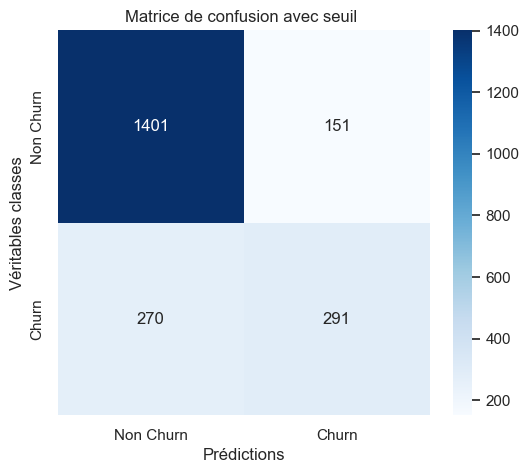

Faux Positifs : Client prédit comme partant, mais reste	Coûts inutiles de rétention
Faux Négatifs : Client prédit comme fidèle, mais part	Perte de revenu non anticipée
Faux Positifs (FP) : 151 , soit 7.15% du total
Faux Négatifs (FN) : 270 , soit 12.78% du total


In [27]:
best_model = grid_search.best_estimator_

y_test_pred = best_model.predict(X_test)


# Rapport de classification
print(f"Classification report :")
print(classification_report(y_test, y_test_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_test_pred)

# Affichage de la matrice
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Churn', 'Churn'], yticklabels=['Non Churn', 'Churn'])
plt.xlabel('Prédictions')
plt.ylabel('Véritables classes')
plt.title(f'Matrice de confusion avec seuil ')
plt.show()




# Calcul des faux positifs (FP) et faux négatifs (FN)
tn, fp, fn, tp = cm.ravel()
total = tn + fp + fn + tp 
print("Faux Positifs : Client prédit comme partant, mais reste	Coûts inutiles de rétention")
print("Faux Négatifs : Client prédit comme fidèle, mais part	Perte de revenu non anticipée")

print(f"Faux Positifs (FP) : {fp} , soit {fp/total:.2%} du total")
print(f"Faux Négatifs (FN) : {fn} , soit {fn/total:.2%} du total")


Le modèle est plus performant pour identifier les clients fidèles que les churners.

En churn marketing, le rappel sur la classe churn est crucial : mieux vaut détecter un maximum de churners (même au prix de quelques faux positifs) pour maximiser l’efficacité des campagnes de rétention.

Il faudrait essayer d’améliorer le rappel sur la classe churn (ex. ajuster le seuil de décision, utiliser un modèle avec un coût de faux négatifs plus élevé, faire un rééquilibrage des classes, etc.)

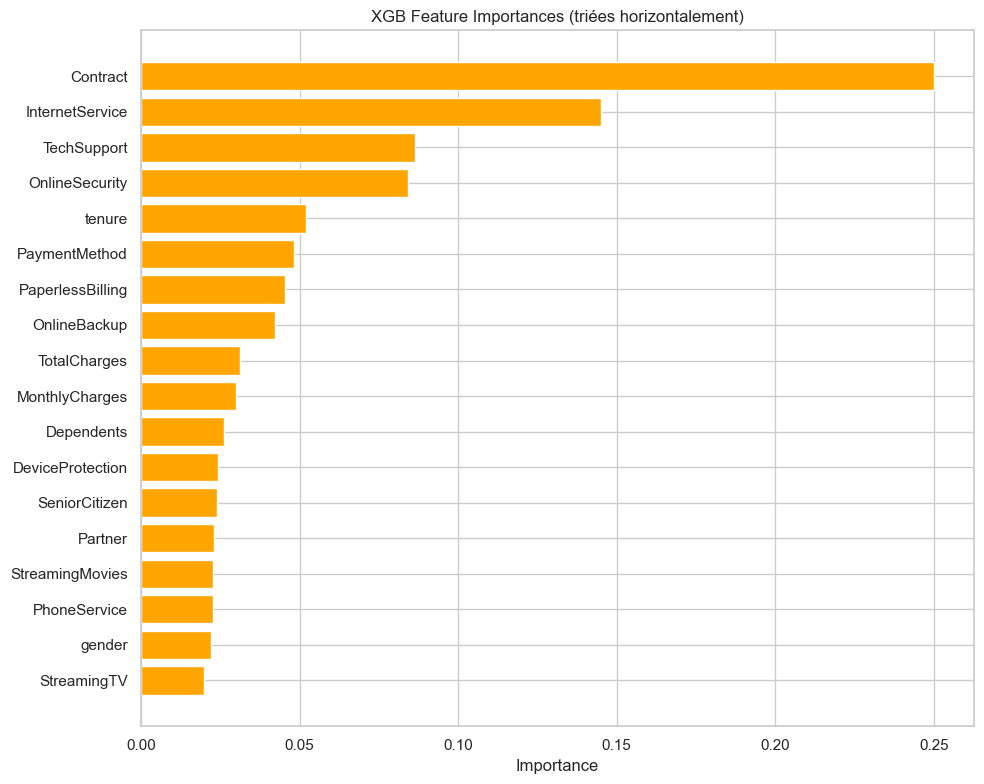

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

importances = best_model.feature_importances_
features = X_test.columns

feat_imp_df = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by='importance', ascending=True)  # Ascendant pour barh (du bas vers le haut)

plt.figure(figsize=(10, 8))
plt.barh(feat_imp_df['feature'], feat_imp_df['importance'], color='orange')
plt.xlabel("Importance")
plt.title("XGB Feature Importances (triées horizontalement)")
plt.tight_layout()
plt.show()

Le modèle capture bien les leviers business clés qui font sens côté churn, notamment la nature du contrat et les services internet/support.
Ces insights peuvent guider les équipes marketing à cibler des offres ou améliorations précises pour réduire le churn.

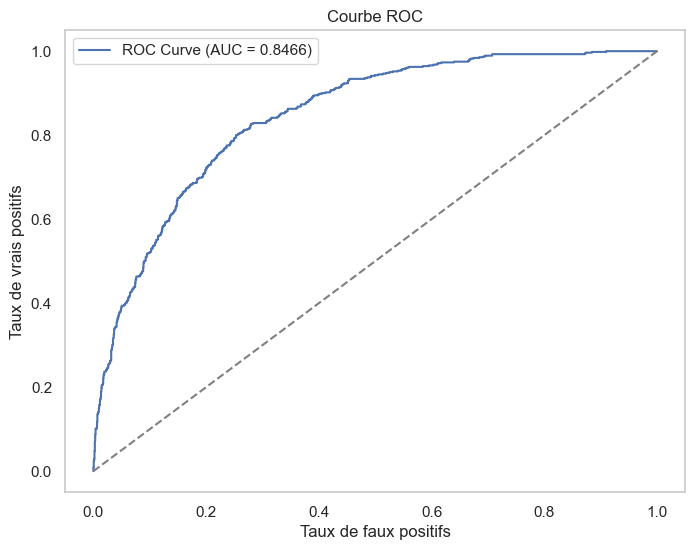

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilités prédites pour la classe positive
y_test_proba = best_model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_test_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC")
plt.legend()
plt.grid()
plt.show()

L’AUC (Area Under the Curve) 0.8 = bon modèle

La forme de la courbe montre la presence encore presente de faux positif et faux negatif 

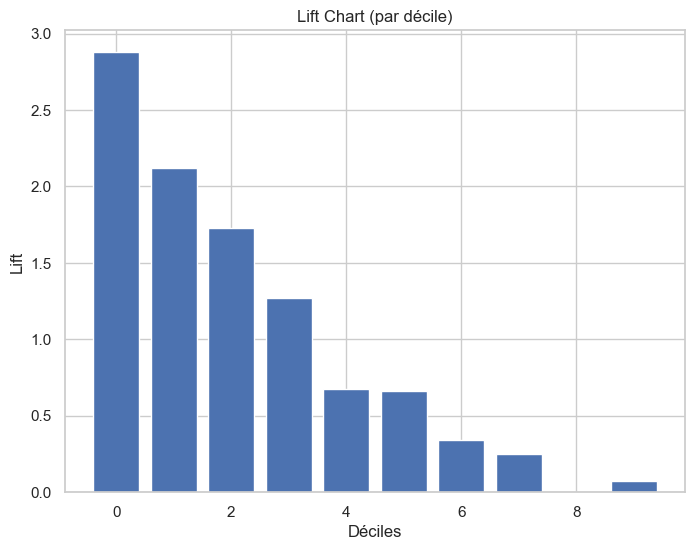

In [30]:
def plot_lift_chart(y_true, y_scores, n_bins=10):
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd

    data = pd.DataFrame({'y_true': y_true, 'y_scores': y_scores})
    data = data.sort_values('y_scores', ascending=False).reset_index(drop=True)
    data['bucket'] = pd.qcut(data.index, q=n_bins, labels=False)

    lift = data.groupby('bucket')['y_true'].mean() / data['y_true'].mean()

    plt.figure(figsize=(8,6))
    plt.bar(range(n_bins), lift)
    plt.xlabel('Déciles')
    plt.ylabel('Lift')
    plt.title('Lift Chart (par décile)')
    plt.show()

plot_lift_chart(y_test, y_test_proba)

Cela signifie qu’en ciblant uniquement les 20–30% de clients les plus à risque, on concentre les efforts marketing là où ils sont les plus rentables.

On évite de gaspiller des ressources sur des clients peu susceptibles de partir.

Le modèle permet donc de prioriser les campagnes de rétention intelligemment, en maximisant le retour sur investissement (ROI).


**"Si on devait n’envoyer une campagne de rétention qu’à 10% de nos clients, alors grâce à ce modèle, on toucherait près de 3 fois plus de churners que par une sélection aléatoire."**

##  6. Interprétation du modèle avec SHAP

SHAP (SHapley Additive exPlanations) permet de comprendre comment chaque variable contribue à la prédiction d’un modèle. Il décompose la prédiction client par client, comme une “facture” des facteurs de risque.


In [31]:
df.iloc[755]

customerID                6683-VLCTZ
gender                          Male
SeniorCitizen                      1
Partner                           No
Dependents                        No
tenure                     -0.503758
PhoneService                     Yes
MultipleLines                    Yes
InternetService          Fiber optic
OnlineSecurity                    No
OnlineBackup                      No
DeviceProtection                 Yes
TechSupport                       No
StreamingTV                      Yes
StreamingMovies                  Yes
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges              1.122986
TotalCharges               -0.192802
Churn                              1
Name: 755, dtype: object

In [32]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4994,0.263051,0,0.329163,0.314756,-0.585198,0.268832,0.418466,0.146873,0.402894,0.392056,0.419328,0.303452,0.302434,0.428624,0.340068,0.456469,1.039896,-0.237848
6828,0.263051,0,0.196459,0.148603,-0.992402,0.268832,0.069288,0.069288,0.069288,0.069288,0.069288,0.069288,0.069288,0.030201,0.156716,0.195013,-1.519271,-0.916848
755,0.267554,1,0.329163,0.314756,-0.503758,0.268832,0.418466,0.420254,0.402894,0.229384,0.419328,0.303452,0.302434,0.428624,0.340068,0.456469,1.122986,-0.192802
404,0.267554,0,0.329163,0.314756,-0.503758,0.268832,0.069288,0.069288,0.069288,0.069288,0.069288,0.069288,0.069288,0.030201,0.340068,0.195013,-1.497668,-0.820800
981,0.267554,0,0.196459,0.148603,0.310650,0.268832,0.069288,0.069288,0.069288,0.069288,0.069288,0.069288,0.069288,0.030201,0.156716,0.195013,-1.500991,-0.648932


In [33]:
# Index des lignes dans train et test par rapport au df d'origine
train_idx = X_train.index
test_idx = X_test.index

# Supposons que la colonne 'Contract' est dans df (non encodée)
X_train['Contract_orig'] = df.loc[train_idx, 'Contract']
X_test['Contract_orig'] = df.loc[test_idx, 'Contract']

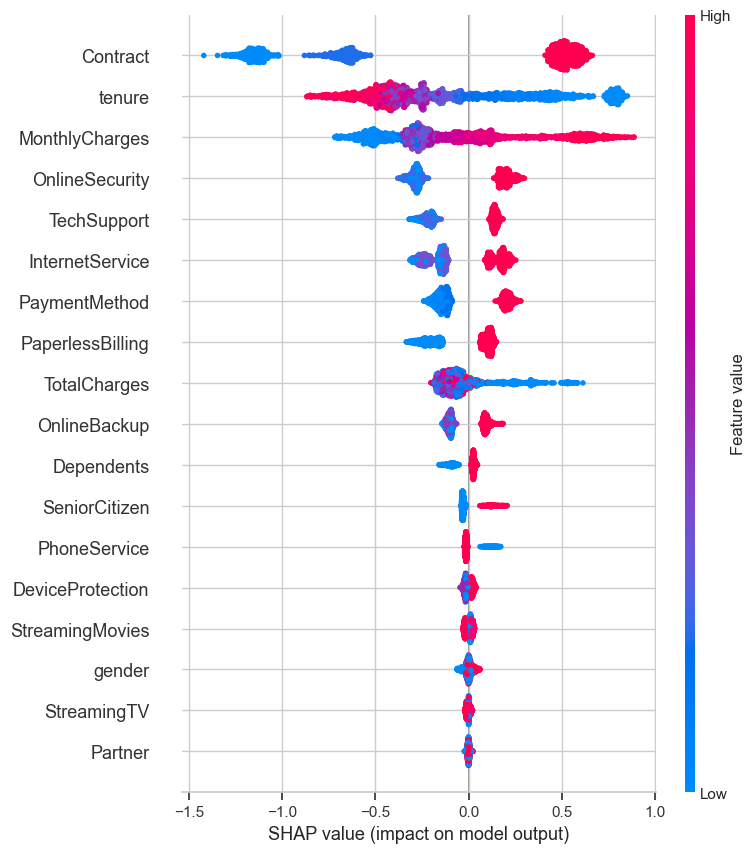

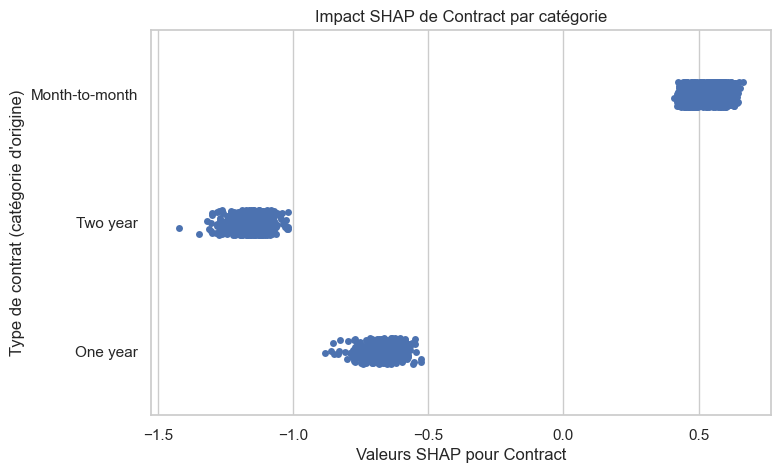

In [34]:
import shap

# Copie de X_test
X_test_tmp = X_test.drop(columns=['Contract_orig'])

# Supposons que best_model est ton modèle entraîné (XGBClassifier)
explainer = shap.Explainer(best_model)
shap_values = explainer(X_test_tmp)

# Summary plot général
shap.summary_plot(shap_values.values, X_test_tmp, feature_names=X_test_tmp.columns)

# Plot SHAP pour la feature Contract avec catégories originales
feat_name = 'Contract'  # remplace par ton nom exact si différent
feat_idx = X_test.columns.get_loc(feat_name)
shap_vals_contract = shap_values.values[:, feat_idx]

plt.figure(figsize=(8, 5))
sns.stripplot(x=shap_vals_contract, y=X_test['Contract_orig'], jitter=True)
plt.xlabel("Valeurs SHAP pour Contract")
plt.ylabel("Type de contrat (catégorie d'origine)")
plt.title("Impact SHAP de Contract par catégorie")
plt.show()


Les clients avec un contrat à long terme (2 ans) ont un effet SHAP négatif fort → ils sont beaucoup moins susceptibles de partir (fidélité élevée).

Les contrats courts (month-to-month) ont une valeur encodée élevée et un effet SHAP positif → ils augmentent la probabilité de churn, ce qui est cohérent avec l’intuition métier.

Les couleurs du plot reflètent donc bien la relation entre la valeur de la feature (contrat) et son impact sur le churn.



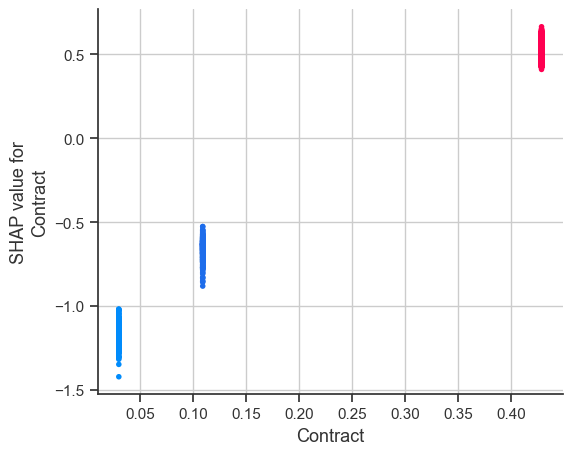

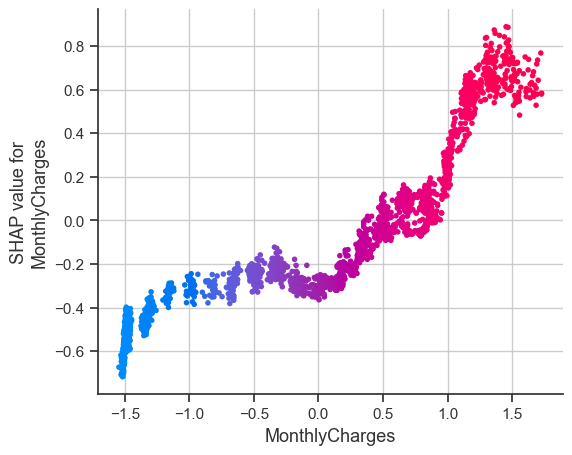

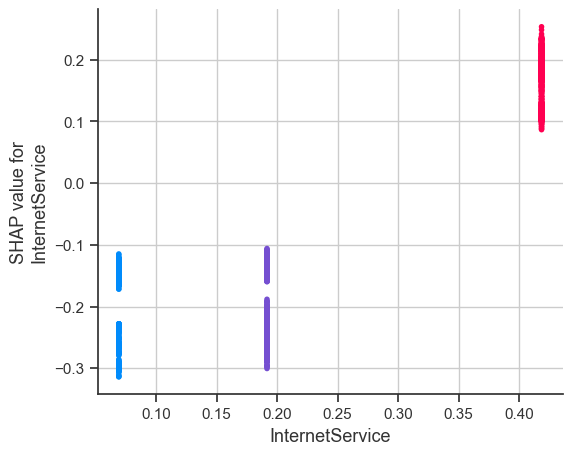

In [35]:
import shap

# Si 'Contract_orig' contient la vraie catégorie, on l'utilise dans X_test_tmp pour SHAP
X_test_tmp = X_test.drop(columns=['Contract_orig'])  # input pour le modèle, sans colonne d'origine

explainer = shap.Explainer(best_model)
shap_values = explainer(X_test_tmp)



# Dependence plot SHAP sur la feature 'Contract' (encodée)
# Pour garder la vraie catégorie en couleur, on utilise interaction_index sur 'Contract_orig'
shap.dependence_plot(
    "Contract",            # feature encodée à analyser
    shap_values.values,    # valeurs shap
    X_test_tmp,            # dataframe avec 'Contract_orig' ajoutée
    interaction_index='Contract',  # coloration selon catégorie d'origine
)


# Dependence plot SHAP sur la feature 'Contract' (encodée)
# Pour garder la vraie catégorie en couleur, on utilise interaction_index sur 'Contract_orig'
shap.dependence_plot(
    "MonthlyCharges",            # feature encodée à analyser
    shap_values.values,    # valeurs shap
    X_test_tmp,            # dataframe avec 'Contract_orig' ajoutée
    interaction_index='MonthlyCharges',  # coloration selon catégorie d'origine
)
# Dependence plot SHAP sur la feature 'Contract' (encodée)
# Pour garder la vraie catégorie en couleur, on utilise interaction_index sur 'Contract_orig'
shap.dependence_plot(
    "InternetService",            # feature encodée à analyser
    shap_values.values,    # valeurs shap
    X_test_tmp,            # dataframe avec 'Contract_orig' ajoutée
    interaction_index='InternetService',  # coloration selon catégorie d'origine
)

---


 📌 Type de contrat (`Contract`)
- **Les clients avec un contrat "Month-to-month"** (renouvelé chaque mois) ont des **valeurs SHAP très positives** (jusqu’à +0.5), ce qui **augmente fortement la probabilité de churn**.
- **À l’inverse, les contrats de 1 ou 2 ans** ont des **valeurs SHAP négatives**, ce qui signifie qu’ils **protègent contre le churn**.

**🎯 Ce que ça signifie pour la stratégie CRM :**
- Cibler en priorité les clients en contrat **"Month-to-month"** avec des **offres engageantes ou avantages fidélité**.
- Promouvoir les contrats à engagement plus long pour **réduire le risque de départ**.

---

💰 Montant mensuel (`MonthlyCharges`)
- **Plus la facture mensuelle est élevée**, plus la **valeur SHAP est élevée**, donc **plus le client est à risque de churn**.
- Les clients avec une charge mensuelle élevée peuvent être **plus exigeants** sur la qualité de service.

**🎯 Stratégie CRM :**
- Identifier les **clients à haute facture** et vérifier s’ils cumulent d’autres signaux faibles (ex: contrat court, pas de support).
- Leur proposer un **service client premium**, ou des **réductions ciblées** pour améliorer la valeur perçue.

---

 🌐 Type de connexion internet (`InternetService`)
- Les clients ayant la **fibre optique** présentent des **valeurs SHAP positives** (≈ +0.2), indiquant un **risque de churn plus élevé**.
- Les clients avec DSL ou sans service internet ont des **valeurs SHAP plus faibles voire négatives**.

**🧩 Interprétation possible :**
- Les clients fibre paient souvent plus cher et sont **plus connectés, donc plus volatils**.
- Cela peut aussi **masquer des insatisfactions** sur la qualité du service fibre.

**🎯 Recommandations CRM :**
- **Segmenter les clients fibre** pour :
  - Lancer des **enquêtes de satisfaction ciblées**.
  - Proposer des **offres personnalisées avant échéance de contrat**.
  - **Renforcer le support** pour améliorer la perception du service.

---

## 7. Segmentation des clients à risque

In [36]:
from sklearn.metrics import roc_curve

# Prédire les probabilités sur l'ensemble de test
y_proba = best_model.predict_proba(X_test_tmp)[:, 1]

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculer l'indice de Youden : J = Sensibilité - (1 - Spécificité)
j_scores = tpr - fpr
seuil_optimal = thresholds[np.argmax(j_scores)]

print(f"Seuil optimal (Youden): {seuil_optimal:.3f}")

from sklearn.metrics import f1_score

best_f1 = 0
best_threshold = 0

for thresh in np.arange(0.1, 0.9, 0.01):
    y_pred_thresh = (y_proba >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = thresh

print(f"Seuil avec meilleur F1-score: {best_threshold:.2f} (F1: {best_f1:.2f})")

# Top 20% en risque → seuil à 80e percentile
seuil_80 = np.percentile(y_proba, 80)
print(f"Seuil à 80e percentile des proba: {seuil_80:.2f}")

Seuil optimal (Youden): 0.258
Seuil avec meilleur F1-score: 0.32 (F1: 0.64)
Seuil à 80e percentile des proba: 0.51


In [37]:
import pandas as pd
import numpy as np

# 1. Prédictions de probas sur l'ensemble test
y_proba = best_model.predict_proba(X_test_tmp)[:, 1]  # proba de churn

# 2. Définir un seuil de risque élevé (ex: seuil optimal trouvé précédemment)
seuil_risque = 0.32  # ajuste selon ton seuil optimal

# 3. Création du DataFrame avec identifiants et prédictions
df_risque = pd.DataFrame({
    "CustomerID": df.loc[X_test.index, "customerID"],
    "Probabilité_Churn": y_proba,
    "Type_Contrat": df.loc[X_test.index, "Contract"],
    "Montant_Mensuel": df.loc[X_test.index, "MonthlyCharges"],
    "Internet": df.loc[X_test.index, "InternetService"]
})

# 4. Ajouter un segment : "Risque élevé" ou "Risque faible"
df_risque["Segment"] = np.where(df_risque["Probabilité_Churn"] >= seuil_risque, "Risque élevé", "Risque faible")

# 5. Ajouter recommandation métier simple (exemple)
def reco(row):
    if row["Segment"] == "Risque élevé":
        if row["Type_Contrat"] == "Month-to-month":
            return "Proposer offre fidélité"
        elif row["Montant_Mensuel"] > 80:
            return "Offrir réduction premium"
        elif row["Internet"] == "Fiber optic":
            return "Améliorer service fibre"
        else:
            return "Campagne CRM générique"
    else:
        return "-"

df_risque["Recommandation"] = df_risque.apply(reco, axis=1)

# 6. Affichage des clients à risque élevé
df_risque[df_risque["Segment"] == "Risque élevé"].sort_values(by="Probabilité_Churn", ascending=False).head(10)


,CustomerID,Probabilité_Churn,Type_Contrat,Montant_Mensuel,Internet,Segment,Recommandation
3380,5178-LMXOP,0.883995,Month-to-month,1.008322,Fiber optic,Risque élevé,Proposer offre fidélité
4585,1069-XAIEM,0.873268,Month-to-month,0.674301,Fiber optic,Risque élevé,Proposer offre fidélité
6866,0295-PPHDO,0.869880,Month-to-month,1.019955,Fiber optic,Risque élevé,Proposer offre fidélité
6748,6230-BSUXY,0.868867,Month-to-month,0.672639,Fiber optic,Risque élevé,Proposer offre fidélité
6623,9248-OJYKK,0.856197,Month-to-month,0.388472,Fiber optic,Risque élevé,Proposer offre fidélité
5474,4912-PIGUY,0.853813,Month-to-month,0.659345,Fiber optic,Risque élevé,Proposer offre fidélité
2194,2514-GINMM,0.851388,Month-to-month,0.489842,Fiber optic,Risque élevé,Proposer offre fidélité
642,0970-ETWGE,0.849618,Month-to-month,0.823863,Fiber optic,Risque élevé,Proposer offre fidélité
2397,3722-WPXTK,0.848521,Month-to-month,0.783980,Fiber optic,Risque élevé,Proposer offre fidélité
4326,1455-ESIQH,0.847777,Month-to-month,0.808907,Fiber optic,Risque élevé,Proposer offre fidélité


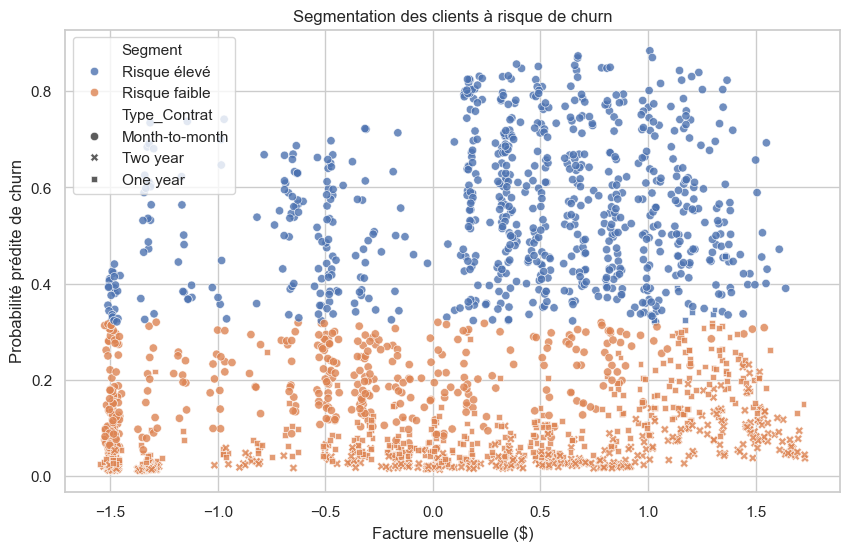

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_risque,
    x="Montant_Mensuel",
    y="Probabilité_Churn",
    hue="Segment",
    style="Type_Contrat",
    alpha=0.8
)
plt.title("Segmentation des clients à risque de churn")
plt.xlabel("Facture mensuelle ($)")
plt.ylabel("Probabilité prédite de churn")
plt.grid(True)
plt.show()

In [39]:
counts_segment = df_risque['Segment'].value_counts()
print(counts_segment)

Segment
Risque faible    1346
Risque élevé      767
Name: count, dtype: int64


## 8. Recommandations métier

### Actions prioritaires

- 🎯 **Lancer une campagne de fidélisation ciblée** sur le segment des clients à contrat mensuel ("Month-to-month") qui présentent un risque élevé de churn.  
- 🕒 **Prioriser les clients avec une ancienneté ("tenure") supérieure à 6 mois** pour maximiser l’impact des offres de rétention.  
- 💸 **Proposer des offres spéciales ou des réductions personnalisées** aux clients ayant des factures mensuelles élevées (MonthlyCharges) pour diminuer leur propension à churner.  
- 📞 **Renforcer le support client** pour les utilisateurs ayant des services sensibles comme la fibre optique ou le support technique, qui présentent un risque accru.  
- 📊 **Segmenter les clients fibre** pour des enquêtes de satisfaction ciblées et amélioration du service.  


**Tableau de recommandations par segment**

| Segment client                          | Risque estimé | Action recommandée              |
|----------------------------------------|---------------|----------------------------------|
| Contrat mensuel + faible tenure        | Élevé         | Offre de fidélisation immédiate |
| Tenure > 24 mois + contrat 1 an        | Moyen         | Suivi satisfaction              |


### Estimation du ROI potentiel




In [40]:
file_path = "data/Customer-Churn.csv"
df = pd.read_csv(file_path)


# Nombre total de clients dans le dataset (exemple : train + test)
total_clients = len(df)  # ou X_test.shape[0] selon ce que tu veux prendre

# Taux de churn actuel (en proportion)
taux_churn = y.mean()  # par exemple, y est ta cible binaire 0/1 churn

# Réduction visée du churn (ex : 10% de réduction relative)
reduction_churn = 0.10

# Nombre de clients churn actuellement
clients_churn = total_clients * taux_churn

# Nombre de clients retenus après campagne
clients_retenus = clients_churn * reduction_churn

# Valeur moyenne par client (annuelle) = moyenne MonthlyCharges * 12
valeur_moyenne_annuelle = df['MonthlyCharges'].mean() * 12

# Estimation du gain
gain_estime = clients_retenus * valeur_moyenne_annuelle

print(f"Nombre total de clients : {total_clients}")
print(f"Taux de churn actuel : {taux_churn:.2%}")
print(f"Clients churn actuels : {clients_churn:.0f}")
print(f"Clients retenus avec campagne : {clients_retenus:.0f}")
print(f"Valeur moyenne annuelle par client : {valeur_moyenne_annuelle:.2f} €")
print(f"Gain financier estimé : {gain_estime:,.0f} €")

Nombre total de clients : 7043
Taux de churn actuel : 26.54%
Clients churn actuels : 1869
Clients retenus avec campagne : 187
Valeur moyenne annuelle par client : 777.14 €
Gain financier estimé : 145,248 €


## 9 PIPELINE RAPIDE

### PRÉPROCESSING 

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBClassifier
import pandas as pd

def prepare_data(df, target_col='Churn', test_size=0.2, random_state=42):
    df = df.copy()
    
    # Nettoyage TotalCharges
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df = df.dropna(subset=['TotalCharges'])  # ou remplir par mediane si tu préfères

    # Encode la target
    df[target_col] = df[target_col].map({'Yes': 1, 'No': 0})

    # Séparation X / y
    y = df[target_col]
    X = df.drop(columns=[target_col, 'customerID'])  # customerID exclu, inutile pour l'apprentissage

    return X, y

# Charger et préparer les données (exemple)
# df = pd.read_csv("ton_fichier.csv")
# X, y = prepare_data(df)

# Split train/test
def split_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state)

# Colonnes numériques et catégorielles (extrait de X)
def get_column_types(X):
    cat_cols = X.select_dtypes(include=['object']).columns.tolist()
    num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    return num_cols, cat_cols

# Création pipeline avec préprocessing + modèle
def create_pipeline(X):
    num_cols, cat_cols = get_column_types(X)

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
        ]
    )

    model = XGBClassifier(
        learning_rate=0.01,
        max_depth=3,
        n_estimators=500,
        subsample=0.3,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    return pipeline


### EXECUTION DE PIPELINE

In [42]:
# Préparation données
df_pipeline = pd.read_csv("data/Customer-Churn.csv")
X, y = prepare_data(df_pipeline)

# Split train/test
X_train, X_test, y_train, y_test = split_data(X, y)

# Création pipeline
pipeline = create_pipeline(X_train)

# Entraînement
pipeline.fit(X_train, y_train)

# Évaluation
from sklearn.metrics import roc_auc_score

y_pred_proba = pipeline.predict_proba(X_test)[:,1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC sur test : {auc_score:.4f}")

c:\Users\yonas\anaconda3\envs\churn_env\lib\site-packages\xgboost\training.py:183: UserWarning: [23:25:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


AUC sur test : 0.8408
